<a href="https://colab.research.google.com/github/jamiewu128/AIA_Example/blob/master/ToDo_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://jamiewu128@bitbucket.org/jamiewu128/todo_prediction.git

Cloning into 'todo_prediction'...
remote: Counting objects: 26, done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 10), reused 0 (delta 0)
Unpacking objects: 100% (26/26), done.


In [0]:
cd /content/todo_prediction/

/content/todo_prediction


In [0]:
!git pull

remote: Counting objects: 4, done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 2), reused 0 (delta 0)
Unpacking objects: 100% (4/4), done.
From https://bitbucket.org/jamiewu128/todo_prediction
   2c36b53..4a084c8  master     -> origin/master
Updating 2c36b53..4a084c8
Fast-forward
 dict.txt                  |   2 +-
 noto_sans_cjk_regular.otf | Bin 0 -> 16431292 bytes
 2 files changed, 1 insertion(+), 1 deletion(-)
 create mode 100644 noto_sans_cjk_regular.otf


In [0]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as et
import jieba
from gensim.models import word2vec
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [0]:
myfont = FontProperties(fname='/content/todo_prediction/noto_sans_cjk_regular.otf')

#Âá∫Âã§Âà∑Âç°Ë®òÈåÑ

In [0]:
sheetName=['‰∫∫Âì°Ë≥áÊñô','201903-201905']
yearsInCompany=pd.read_excel('/content/todo_prediction/attendance.xlsx', sheet_name=sheetName[0],index_col=None)
attendLog=pd.read_excel('/content/todo_prediction/attendance.xlsx', sheet_name=sheetName[1], index_col=None)

In [0]:
print(yearsInCompany.head(30))
print(attendLog.head(20))

          Â∑•Ëôü   ÂßìÂêç   ÊúçÂãôÂπ¥Ë≥á
0   01000073  Âë®Ê¨£‰º∂  18.92
1   01090191  Ê∏∏ÈùúÂÆú   9.06
2   01100090  Áéã‰øäÁ®ã   9.04
3   01120216  ÊûóÁõ∏ÂÆá   6.68
4   01140045  ÈÉ≠‰øäÂÆè   4.70
5   01150023  ÊûóÂì≤Â¶Ç   4.11
6   01150034  ÊõæËÅñÁëã   4.04
7   01150038  Ë®±ËÇ≤Áëû   3.98
8   01160047  Âê≥ÂÆ∂Áèç   2.82
9   01160059  È´òÁ´ãËïé   2.66
10  01160082  Âê≥Á¥ÄËáª   2.60
11  01170002  ÁéãÂ®ÅÊéà   2.44
12  01170004  Ë≥¥ÊÖ∂ËÅ∞   2.41
13  01170009  Ë®±Á∂≠Âæ∑   2.35
14  01170064  ÈÑ≠Á•êÁúü   1.83
15  01180003  ÁéãÂÇ≥Áëã   1.39
16  01180024  Èô≥ÁÇ≥Áíã   1.18
17  01190051  ÁéãÁôæÂ∑ù   0.08
18  G2140005  ÊõæÂ£´Áëã   5.32
19  G2140009  ÂäâÂÜ†Âª∑   5.20
20  J1120003  ËëâÂïüÁ´†   7.12
          Â∑•Ëôü   ÂßìÂêç          ÈñÄÁ¶ÅÂç°Ëôü                     Âà∑Âç°ÊôÇÈñì
0   01000073  Âë®Ê¨£‰º∂  138100007310  2019-03-04 13:59:22.000
1   01000073  Âë®Ê¨£‰º∂  138100007310  2019-03-04 13:59:40.000
2   01000073  Âë®Ê¨£‰º∂  138100007310  2019-03-04 16:46:04.000
3   01000073  Âë®Ê¨£‰º∂  138100007310 

In [0]:
employee_id = yearsInCompany['Â∑•Ëôü']
date_time_str = attendLog['Âà∑Âç°ÊôÇÈñì']


#date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

In [0]:
date_time_obj0 = datetime.datetime.strptime(date_time_str[0], '%Y-%m-%d %H:%M:%S.%f')
date_time_obj1 = datetime.datetime.strptime(date_time_str[7], '%Y-%m-%d %H:%M:%S.%f')

In [0]:
date_list=[]
hour_list=[]
min_list=[]
date_all_list=[]
weekday_list=[]
for d in date_time_str:
  dt=datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f')
  date_list.append(dt.date())
  hour_list.append(dt.hour)
  min_list.append(dt.minute)
  weekday_list.append(dt.weekday()+1)
  date_all_list.append(dt)
  
  
attend_df=pd.DataFrame({
    'id':attendLog['Â∑•Ëôü'],
    'name':attendLog['ÂßìÂêç'],
    'card_number':attendLog['ÈñÄÁ¶ÅÂç°Ëôü'],
    'date':date_list,
    'hour':hour_list,
    'minute':min_list,
    'weekday':weekday_list,
    'datetime':attendLog['Âà∑Âç°ÊôÇÈñì']})
  

In [0]:
attend_df.head(10)

id name   card_number  ... minute  weekday                 datetime
0  01000073  Âë®Ê¨£‰º∂  138100007310  ...     59        1  2019-03-04 13:59:22.000
1  01000073  Âë®Ê¨£‰º∂  138100007310  ...     59        1  2019-03-04 13:59:40.000
2  01000073  Âë®Ê¨£‰º∂  138100007310  ...     46        1  2019-03-04 16:46:04.000
3  01000073  Âë®Ê¨£‰º∂  138100007310  ...     50        1  2019-03-04 16:50:05.000
4  01000073  Âë®Ê¨£‰º∂  138100007310  ...     19        1  2019-03-04 20:19:25.000
5  01000073  Âë®Ê¨£‰º∂  138100007310  ...     19        1  2019-03-04 20:19:41.000
6  01000073  Âë®Ê¨£‰º∂  138100007310  ...     51        2  2019-03-05 09:51:25.000
7  01000073  Âë®Ê¨£‰º∂  138100007310  ...     48        2  2019-03-05 16:48:35.000
8  01000073  Âë®Ê¨£‰º∂  138100007310  ...     49        2  2019-03-05 16:49:32.000
9  01000073  Âë®Ê¨£‰º∂  138100007310  ...     19        2  2019-03-05 20:19:39.000

[10 rows x 8 columns]

In [0]:
attend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8255 entries, 0 to 8254
Data columns (total 8 columns):
id             8255 non-null object
name           8255 non-null object
card_number    8255 non-null int64
date           8255 non-null object
hour           8255 non-null int64
minute         8255 non-null int64
weekday        8255 non-null int64
datetime       8255 non-null object
dtypes: int64(4), object(4)
memory usage: 516.0+ KB


(array([  27.,    0.,    0., 1450., 1309., 1779., 1738.,  899.,  834.,
         219.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

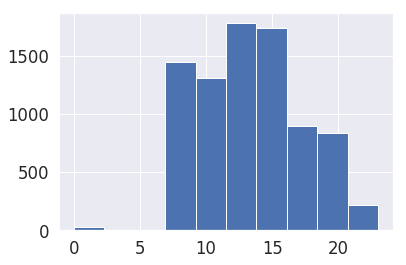

In [0]:
plt.hist(attend_df['hour'])

In [0]:
attend_df[attend_df.hour<6]

id name   card_number  ... minute  weekday                 datetime
489   01090191  Ê∏∏ÈùúÂÆú  138109019110  ...     13        5  2019-05-03 01:13:23.000
1347  01100090  Áéã‰øäÁ®ã  138110009020  ...     19        5  2019-05-24 00:19:17.000
1348  01100090  Áéã‰øäÁ®ã  138110009020  ...     32        5  2019-05-24 00:32:28.000
3357  01160059  È´òÁ´ãËïé  138116005910  ...      2        1  2019-04-01 01:02:04.000
3358  01160059  È´òÁ´ãËïé  138116005910  ...      2        1  2019-04-01 01:02:08.000
3359  01160059  È´òÁ´ãËïé  138116005910  ...     10        1  2019-04-01 01:10:31.000
3360  01160059  È´òÁ´ãËïé  138116005910  ...     11        1  2019-04-01 01:11:52.000
3488  01160059  È´òÁ´ãËïé  138116005910  ...     13        5  2019-05-03 01:13:24.000
4648  01170004  Ë≥¥ÊÖ∂ËÅ∞  138117000410  ...     38        1  2019-04-29 00:38:01.000
4666  01170004  Ë≥¥ÊÖ∂ËÅ∞  138117000410  ...     18        4  2019-05-02 01:18:52.000
4670  01170004  Ë≥¥ÊÖ∂ËÅ∞  138117000410  ...     13        5  2019-05-03 01:13:19.000
4814  01170004  Ë≥¥ÊÖ∂ËÅ∞  138117000410  ...     34        5  2019-05-24 00:34:15.000
5051  01170009  Ë®±Á∂≠Âæ∑  138117000910  ...      1        1  2019-04-01 01:01:10.000
5584  01170064  ÈÑ≠Á•êÁúü  138117006410  ...      5        5  2019-05-03 01:05:09.000
6114  01180024  Èô≥ÁÇ≥Áíã  138118002410  ...     54        1  2019-04-01 00:54:28.000
6527  0118G003  ÁéãÁôæÂ∑ù  138118900310  ...      1        1  2019-04-01 01:01:06.000
6595  0118G003  ÁéãÁôæÂ∑ù  138118900310  ...     13        5  2019-05-03 01:13:28.000
7371  G2140005  ÊõæÂ£´Áëã  138914000510  ...     54        1  2019-04-01 00:54:30.000
7440  G2140005  ÊõæÂ£´Áëã  138914000510  ...      3        3  2019-05-01 00:03:33.000
7499  G2140005  ÊõæÂ£´Áëã  138914000510  ...     34        5  2019-05-24 00:34:19.000
7655  G2140009  ÂäâÂÜ†Âª∑  138914000910  ...      1        1  2019-04-01 01:01:04.000
8020  J1120003  ËëâÂïüÁ´†  138712000330  ...     32        6  2019-04-13 00:32:50.000
8021  J1120003  ËëâÂïüÁ´†  138712000330  ...     34        6  2019-04-13 00:34:35.000
8092  J1120003  ËëâÂïüÁ´†  138712000330  ...     13        5  2019-05-03 01:13:26.000
8189  J1120003  ËëâÂïüÁ´†  138712000330  ...      0        3  2019-05-22 00:00:31.000
8190  J1120003  ËëâÂïüÁ´†  138712000330  ...      0        3  2019-05-22 00:00:35.000
8191  J1120003  ËëâÂïüÁ´†  138712000330  ...      1        3  2019-05-22 00:01:25.000

[27 rows x 8 columns]

###Ë®àÁÆóÊúâÂä†Áè≠ÊÉÖÂΩ¢ÁöÑË®òÈåÑ

In [0]:
employId=attend_df['id'].unique()
#print(employId)
my_cols=['id','name','hour','datetime']
id_ls=[]
name_ls=[]
hour_ls=[]
weekday_ls=[]
dtime_ls=[]
for employ in employId:
  temp_df=attend_df[attend_df.id==employ]
  temp_df=temp_df[(temp_df.hour<6) | (temp_df.hour>=20) | (temp_df.weekday>=6)]#Êôö‰∏ä8ÈªûÂæåÈõ¢Èñã Êàñ ÊòüÊúüÂÖ≠Êó•Âà∞ÂÖ¨Âè∏
  for i in range(len(temp_df)):
    id_ls.append(temp_df['id'].iloc[i])
    name_ls.append(temp_df['name'].iloc[i])
    hour_ls.append(temp_df['hour'].iloc[i])
    weekday_ls.append(temp_df['weekday'].iloc[i])
    dtime_ls.append(temp_df['datetime'].iloc[i])
  
over_df=pd.DataFrame({'id':id_ls,'name':name_ls,'hour':hour_ls,'weekday':weekday_ls,'datetime':dtime_ls})
print(len(over_df))
over_df.head()


582


id name  hour  weekday                 datetime
0  01000073  Âë®Ê¨£‰º∂    20        1  2019-03-04 20:19:25.000
1  01000073  Âë®Ê¨£‰º∂    20        1  2019-03-04 20:19:41.000
2  01000073  Âë®Ê¨£‰º∂    20        2  2019-03-05 20:19:39.000
3  01000073  Âë®Ê¨£‰º∂    20        2  2019-03-05 20:19:55.000
4  01000073  Âë®Ê¨£‰º∂    20        3  2019-03-06 20:21:08.000

###Ë®àÁÆóÊØè‰∏ÄÂì°Â∑•Âú®Ëæ¶ÂÖ¨ÂÆ§ÁöÑÂÅúÁïôÊôÇÊï∏

In [0]:
id_list=[]
name_list=[]
date_list=[]
date_str_list=[]
work_hour_list=[]
# every employee
for _id in employee_id:
  emp=attend_df[attend_df.id==_id]
  date_u=emp['date'].unique()
  
  # by date
  for _date in date_u:
    emp_d=emp[emp.date==_date]
    emp_d_len=len(emp_d)
    date0_str=emp_d.head(1)['datetime']
    name=emp_d.head(1)['name']
    
    #print(emp_datetime)
    #print(type(emp_datetime))
    #print('date:',_date,'  len:',emp_d_len)
    id_list.append(_id)
    name_list.append(name.iloc[0])
    date_list.append(_date)
    date_str_list.append(date0_str.iloc[0])
    
    if emp_d_len>1:
      
      date1_str=emp_d.tail(1)['datetime']
      #print('date0:',date0_str)
      #print('date1:',date1_str)
      
      date0=datetime.datetime.strptime(date0_str.iloc[0], '%Y-%m-%d %H:%M:%S.%f')
      date1=datetime.datetime.strptime(date1_str.iloc[0], '%Y-%m-%d %H:%M:%S.%f')
    
      dateDiff=date1-date0
      DiffInHours=dateDiff.total_seconds() / 3600
      #print('DiffInHours: ',DiffInHours)
      work_hour_list.append(DiffInHours)
      
    elif emp_d_len==1:
      # TODO : work over night ?
      #print('date: ',date0_str.iloc[0],' ',name)
      work_hour_list.append(0)
      
      
df_wh=pd.DataFrame({'id':id_list,'name':name_list,'date':date_list,'work_hour':work_hour_list, 'date_str':date_str_list})
df_wh.head()

id name        date  work_hour                 date_str
0  01000073  Âë®Ê¨£‰º∂  2019-03-04   6.338611  2019-03-04 13:59:22.000
1  01000073  Âë®Ê¨£‰º∂  2019-03-05  10.475000  2019-03-05 09:51:25.000
2  01000073  Âë®Ê¨£‰º∂  2019-03-06  10.575000  2019-03-06 09:46:51.000
3  01000073  Âë®Ê¨£‰º∂  2019-03-07   9.683611  2019-03-07 09:49:00.000
4  01000073  Âë®Ê¨£‰º∂  2019-03-08   8.768889  2019-03-08 09:46:28.000

(array([ 38.,  38.,  71., 291., 550.,  93.,  20.,   1.,   7.,   2.]),
 array([ 0.        ,  2.29886111,  4.59772222,  6.89658333,  9.19544444,
        11.49430556, 13.79316667, 16.09202778, 18.39088889, 20.68975   ,
        22.98861111]),
 <a list of 10 Patch objects>)

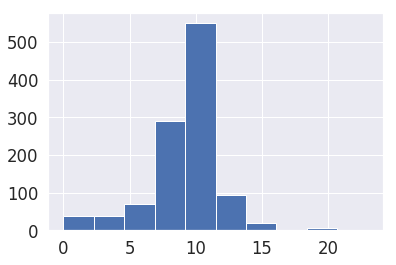

In [0]:
hours=df_wh['work_hour']
plt.hist(hours)

In [0]:
wh0=df_wh[df_wh.work_hour==0]
wh1=df_wh[df_wh.work_hour>8]
wh1_1=wh1[wh1.work_hour<10]
print(len(df_wh))
print(len(wh0))
print(len(wh1_1))

1111
13
537


#ToDoË≥áÊñô

##ToDoÊ∏ÖÂñÆ

In [0]:
xtree = et.parse('/content/todo_prediction/Todo_detail.xml')
xroot = xtree.getroot()
df_cols = [
"ID",
"Title",
"AccountID",
"Username",
"DisplayName",
"TodoStatus",
"GroupID",
"GroupName",
"GroupEnabled",
"GroupLevel",
"RootToDoID",
"ParentToDoID",
"ParentAccountID",
"Progress",
"LastProgress",
"AlertType",
"ProgressUpdateTime",
"Description",
"HasDueTime",
"CreatedDateTime",
"LastUpdatedDateTime",
"StartDateTime",
"DueDateTime"]
out_df = pd.DataFrame(columns = df_cols)

for node in xroot:
  col_values = []
  for col_name in df_cols:
    col_values.append(node.attrib.get(col_name))
  out_df = out_df.append(pd.Series(col_values, index = df_cols), ignore_index=True)

out_df.head(100)

ID                 Title  ...        StartDateTime          DueDateTime
0   12204                FCM ÁßªËΩâ  ...  2019-02-01T00:31:00  2019-03-31T15:59:59
1   12205                   iOS  ...  2019-02-01T00:32:00  2019-03-29T15:59:59
2   12206               Android  ...  2019-02-01T00:32:00  2019-03-29T15:59:59
3   12207     teamup! 90 ÂÑ™Âåñ-ios  ...  2019-02-01T01:09:00  2019-03-31T15:59:59
4   12208    iOS Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar UI   ...  2019-02-01T01:09:00  2019-02-14T15:59:59
5   12209  Android Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar U  ...  2019-02-01T01:10:00  2019-02-14T15:59:59
6   12210              iOS ÈÄöÁü•Ëø∑Ëà™  ...  2019-02-01T01:11:00  2019-02-21T15:59:59
7   12211          Android ÈÄöÁü•Ëø∑Ëà™  ...  2019-02-01T01:11:00  2019-02-21T15:59:59
8   12222       AJA pdf 03 Ë©ïÂàÜË™øÊï¥  ...  2019-02-14T02:35:00  2019-02-22T15:59:59
9   12223                  ÊêúÁ¥¢Â∑•‰Ωú  ...  2019-02-14T02:57:00  2019-03-29T15:59:59
10  12225               OH/Moss  ...  2019-02-14T11:30:00  2019-07-30T15:59:59
11  12226        Moss ÂçáÁ¥ö OHÁï∞Â∏∏ËôïÁêÜ  ...  2019-02-14T11:31:00  2019-07-29T16:00:00
12  12227          H6 ‰øÆÊîπ4ÊîØapiÈúÄÊ±Ç  ...  2019-02-14T11:37:00  2019-02-15T15:59:59
13  12228                  ÊäΩÁçéÊ©üÂà∂  ...  2019-02-14T12:05:00  2019-12-31T15:59:59
14  12229               CTOÈñãÂ∑•ÊäΩÁçé  ...  2019-02-14T12:08:00  2019-02-28T15:59:59
15  12230        #4198 Ë™øÊï¥Âá∫Â∑ÆÁî≥Ë´ãÊµÅÁ®ã  ...  2019-02-14T13:40:00  2019-02-15T04:00:00
16  12231         #4195 ÊêçÁõäË°®‰∏äÂÇ≥ÂïèÈ°å  ...  2019-02-14T13:43:00  2019-02-27T10:00:00
17  12232          GSS HR JOBÂïèÈ°å  ...  2019-02-14T13:48:00  2019-02-18T10:00:00
18  12233            GamaFlowËΩâÁßª  ...  2019-02-14T13:52:00  2019-04-03T10:00:00
19  12234       TT/VM/MashupÂçáÁ¥öÊ°à  ...  2019-02-13T16:00:00  2019-07-31T15:59:59
20  12235            TFSÁöÑÊ∏¨Ë©¶Áí∞Â¢ÉÂª∫ÁΩÆ  ...  2019-02-14T15:34:00  2019-02-22T10:00:00
21  12236        TT/VMÂçáÁ¥öÈúÄÊ±ÇË®™Ë´áÂèäÁ¢∫Ë™ç  ...  2019-02-14T15:37:00  2019-03-22T10:00:00
22  12237             BGOÁ∞°Ë®äÁôºË©±Â∞àÁ∑ö  ...  2019-02-14T17:39:00  2019-02-25T15:59:59
23  12238             1ÊúàÁ∞°Ë®äÂá∫Â∏≥/Â∞çÂ∏≥  ...  2019-02-14T17:46:00  2019-02-15T15:59:59
24  12239       Android #19L005  ...  2019-02-15T00:29:00  2019-02-21T15:59:59
25  12240       Android #19L006  ...  2019-02-15T00:30:00  2019-02-21T15:59:59
26  12241       Android #19L007  ...  2019-02-15T00:32:00  2019-02-27T15:59:59
27  12242       Android #19L002  ...  2019-02-15T00:39:00  2019-02-21T15:59:59
28  12243       Android #19L004  ...  2019-02-15T00:41:00  2019-02-21T15:59:59
29  12244      Android  #19L001  ...  2019-02-15T00:43:00  2019-02-21T15:59:59
..    ...                   ...  ...                  ...                  ...
70  12295     #4234 Êñ∞ÈÄ≤ÂèñÊ∂àÂ†±Âà∞ÈÄöÁü•‰ø°ÂïèÈ°å  ...  2019-02-23T04:55:00  2019-03-05T10:00:00
71  12296               2222223  ...  2019-02-25T03:14:00  2019-03-25T15:59:59
72  12297                 66666  ...  2019-02-25T03:15:00  2019-02-27T15:59:59
73  12298              test0225  ...  2019-02-25T03:26:00  2019-03-07T15:59:59
74  12299                 55555  ...  2019-02-25T03:28:00  2019-02-28T15:59:59
75  12311        ÁáüÈÅãÂæåÂè∞Ê¨äÈôêË™øÊï¥ÁÇ∫ÈõÜÂúòÂºèÊéßÁÆ°  ...  2019-02-27T06:18:00  2019-03-21T15:59:24
76  12312        teamup api(4ÊîØ)  ...  2019-02-27T07:02:00  2019-03-18T16:00:00
77  12313               #19L014  ...  2019-02-27T09:12:00  2019-02-27T15:59:59
78  12329              Áî®Êà∂È´îÈ©óÂÑ™ÂåñÈ†ÖÁõÆ  ...  2019-03-04T12:22:00  2019-04-12T15:59:59
79  12330    PushÊé®Êí≠ÁßªËΩâÔºàGCM=>FCM)  ...  2019-03-04T12:24:00  2019-03-29T15:59:59
80  12331               Êî∂ÁôºÂÆ§Êî∂‰ª∂ÈÄöÁü•  ...  2019-03-04T12:25:00  2019-04-30T15:59:59
81  12332             ‰ºÅÊ•≠ÁµÑÁπî-Á∑äÊÄ•Ë®äÊÅØ  ...  2019-03-04T12:28:00  2019-03-22T15:59:59
82  12333                ÂåøÂêçËá®ÊôÇÁæ§ÁµÑ  ...  2019-03-04T12:33:00  2019-04-19T15:59:59
83  12334               Áæ§ÁµÑÂÖ±Áî®Ë°å‰∫ãÊõÜ  ...  2019-03-04T12:36:00  2019-08-30T15:59:59
84  12335             Â∑•‰ΩúËàáÂ†±Â

In [0]:
len(out_df)

742

In [0]:
out_df[out_df.ID=='12699']

ID   Title  ...        StartDateTime          DueDateTime
239  12699  testmi  ...  2019-03-29T07:45:00  2019-10-29T15:59:59
240  12699  testmi  ...  2019-03-29T07:45:00  2019-10-29T15:59:59

[2 rows x 23 columns]

In [0]:
out_df['GroupName'].unique()

array(['APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä', 'ÁñäÁñäÊ®Ç', '20190215 projec', 'ÈñãÁôºË®ò‰∫ãÊú¨', 'testEric',
       'ÈõÜÂúòÁ∂ìÁáüÊúÉË≠∞', 'ttt', 'Áõ∏ÂÆáÊ≤íÊúâÈ¶ôËïâ', '‰∏≠', 'ü§ëonly michelle2', 'ÂèØÊÑõÁî∑Â≠êÊº¢ 2.0 ',
       'Â∞ºÂÖãÊ∏¨Ê∏¨', '‰∏ÄËµ∑‰∏ãÂçàËå∂', 'ÂëºÂëº', '90Ëê¨', 'gmail Ê∏¨Ë©¶', 'only me', 'aaa', '‰æÜÁ¶è‰∏ÄËôü',
       'ddddd', 'dddddd', 'Ê∏¨Ë©¶ray', 'Áï∂ÊàëÂÄëÂêåÂú®‰∏ÄËµ∑ÔºÅ', 'jamei test', 'workflow',
       'Android QA', '‰∫î‰∫îÂÖ≠ÂÖ≠Âúò1234567890', 'UI/UX(ÁõÆÊ®ôÈ†ÖÁõÆÁÆ°ÁêÜÔºâ', 'terrygroup',
       'Ë∑åÂÄí', 'ÊàëÁöÑÊØèÈÄ±Â†±Âëä', 'CTO teamup!', 'ÂåÖÁßüÂÖ¨', 'Á´ãËïéÁõÆÊ®ôÂ±ïÈñã'], dtype=object)

In [0]:
out_df['TodoStatus'].unique()

array(['0', '1', '12', '2', '6', '11', '3', '7', '8', '9'], dtype=object)

##ToDoÈóú‰øÇ‰∫∫Ê∏ÖÂñÆ

In [0]:
xtree = et.parse('/content/todo_prediction/Todo_member_detail.xml')
xroot = xtree.getroot()
member_df_cols = [
    "ID","Title","AccountID","Username","DisplayName","RoleType","EmployeeCode"
]
member_df = pd.DataFrame(columns = member_df_cols)

for node in xroot:
  col_values = []
  for col_name in member_df_cols:
    col_values.append(node.attrib.get(col_name))
  member_df = member_df.append(pd.Series(col_values, index = member_df_cols), ignore_index=True)

member_df.head(30)

ID                 Title AccountID  ...   DisplayName RoleType EmployeeCode
0   12204                FCM ÁßªËΩâ      2443  ...          Bell        1     G2140005
1   12204                FCM ÁßªËΩâ        11  ...      Joyce Yu        1     01090191
2   12204                FCM ÁßªËΩâ         1  ...    Angus Wang        1     01100090
3   12204                FCM ÁßªËΩâ      2193  ...  Hsiangyu Lin        1     01120216
4   12205                   iOS      3718  ...           ice        1     01180024
5   12206               Android      2457  ...     Peter Liu        1     G2140009
6   12207     teamup! 90 ÂÑ™Âåñ-ios      2443  ...          Bell        1     G2140005
7   12207     teamup! 90 ÂÑ™Âåñ-ios        11  ...      Joyce Yu        1     01090191
8   12208    iOS Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar UI       2443  ...          Bell        1     G2140005
9   12209  Android Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar U      2443  ...          Bell        1     G2140005
10  12210              iOS ÈÄöÁü•Ëø∑Ëà™      2443  ...          Bell        1     G2140005
11  12211          Android ÈÄöÁü•Ëø∑Ëà™         1  ...    Angus Wang        3     01100090
12  12222       AJA pdf 03 Ë©ïÂàÜË™øÊï¥         1  ...    Angus Wang        3     01100090
13  12222       AJA pdf 03 Ë©ïÂàÜË™øÊï¥      2702  ...  Michelle Lin        1     01150023
14  12223                  ÊêúÁ¥¢Â∑•‰Ωú      2757  ...       Ray Hsu        1     01150038
15  12223                  ÊêúÁ¥¢Â∑•‰Ωú      2757  ...       Ray Hsu        1     01150038
16  12225               OH/Moss       960  ...     Lily Chou        1     01000073
17  12225               OH/Moss        11  ...      Joyce Yu        1     01090191
18  12226        Moss ÂçáÁ¥ö OHÁï∞Â∏∏ËôïÁêÜ        11  ...      Joyce Yu        1     01090191
19  12226        Moss ÂçáÁ¥ö OHÁï∞Â∏∏ËôïÁêÜ         1  ...    Angus Wang        3     01100090
20  12227          H6 ‰øÆÊîπ4ÊîØapiÈúÄÊ±Ç      3707  ...     billywang        1     01180003
21  12227          H6 ‰øÆÊîπ4ÊîØapiÈúÄÊ±Ç         1  ...    Angus Wang        3     01100090
22  12228                  ÊäΩÁçéÊ©üÂà∂      2443  ...          Bell        1     G2140005
23  12228                  ÊäΩÁçéÊ©üÂà∂        11  ...      Joyce Yu        1     01090191
24  12229               CTOÈñãÂ∑•ÊäΩÁçé      3162  ...     Ryan Wang        1     01170002
25  12229               CTOÈñãÂ∑•ÊäΩÁçé         1  ...    Angus Wang        3     01100090
26  12230        #4198 Ë™øÊï¥Âá∫Â∑ÆÁî≥Ë´ãÊµÅÁ®ã      3014  ...       Jane Wu        1     01160047
27  12230        #4198 Ë™øÊï¥Âá∫Â∑ÆÁî≥Ë´ãÊµÅÁ®ã         1  ...    Angus Wang        3     01100090
28  12231         #4195 ÊêçÁõäË°®‰∏äÂÇ≥ÂïèÈ°å      3014  ...       Jane Wu        1     01160047
29  12231         #4195 ÊêçÁõäË°®‰∏äÂÇ≥ÂïèÈ°å         1  ...    Angus Wang        3     01100090

[30 rows x 7 columns]

In [0]:
member_df['RoleType'].unique()

array(['1', '3', '4'], dtype=object)

##ToDoÂõûË¶ÜÊ∏ÖÂñÆ

In [0]:
xtree = et.parse('/content/todo_prediction/Todo_reply_detail.xml')
xroot = xtree.getroot()
reply_df_cols = [
    "ID","Title","PostAccount","Username","DisplayName","CommentID","MessageID","ParentID","PostType","MessageStatus","IsReply","RestrictType","RestrictAccounts","Liking","LikeCount","PostedDate","Comment"
]
reply_df = pd.DataFrame(columns = reply_df_cols)

for node in xroot:
  col_values = []
  for col_name in reply_df_cols:
    col_values.append(node.attrib.get(col_name))
  reply_df = reply_df.append(pd.Series(col_values, index = reply_df_cols), ignore_index=True)

reply_df.head()

ID  ...                                       Comment
0  12204  ...                        Â∞áicechiouÊñ∞Â¢ûÁÇ∫„ÄåiOS„ÄçÈ†ÖÁõÆË≤†Ë≤¨‰∫∫
1  12204  ...  ËÆäÊõ¥‰∫Ü„ÄåAndroid„ÄçÈ†ÖÁõÆÁöÑÊà™Ê≠¢ÊôÇÈñìÔºåÁî±2019/02/01ËÆäÊõ¥ÁÇ∫2019/03/29
2  12204  ...                   Â∞áPeter LiuÊñ∞Â¢ûÁÇ∫„ÄåAndroid„ÄçÈ†ÖÁõÆË≤†Ë≤¨‰∫∫
3  12204  ...                                    Âª∫Á´ã [] Â∑•‰ΩúÈ†ÖÁõÆ
4  12204  ...                                 Âª∫Á´ã‰∫ÜÂ∞àÊ°à[FCM ÁßªËΩâ]

[5 rows x 17 columns]

In [0]:
reply_df['PostType'].unique()

array(['14', '0', '2', '19', '1'], dtype=object)

# Ë≥áÊñôÊ∏ÖÁêÜ

            /// Owner(ÂÖ±ÂêåÁÆ°ÁêÜ‰∫∫ÊàñË≤†Ë≤¨‰∫∫)
            /// </summary>
            Owner = 1,
            /// <summary>
            /// ËÅ∑Âãô‰ª£ÁêÜ‰∫∫
            /// </summary>
            Substitute = 2,
            /// <summary>
            /// ÂØ©Ê†∏‰∫∫
            /// </summary>
            Reviewer = 3,
            /// <summary>
            /// ÂèÉËàáËÄÖ
            /// </summary>
            Viewer = 4
            
            ÁõÆÊ®ô=ÁÆ°ÁêÜ‰∫∫(RoleType=1)
            È†ÖÁõÆ=Ë≤†Ë≤¨‰∫∫(RoleType=1) / ÂØ©Ê†∏‰∫∫(RoleType=3) / ÂèÉËàá‰∫∫(RoleType=4)


###ÈÅéÊøæÂá∫ "ÁõÆÊ®ô" Êàñ "È†ÖÁõÆ"

In [0]:
#ÁõÆÊ®ô
project_df=out_df[out_df.ParentToDoID.isna()==True]
print('Project count= ', len(project_df))
#È†ÖÁõÆ
todo_df=out_df[out_df.ParentToDoID.isna()==False] 
print('Todo job count= ',len(todo_df))


Project count=  106
Todo job count=  636


###ÂéªÈô§Ê∏¨Ë©¶Áæ§ÁµÑ (Ë¶ÅÂóé?) 

###ÂéªÈô§Â∞öÊú™ÊåáÂÆöË≤†Ë≤¨‰∫∫ÁöÑÈ†ÖÁõÆ

In [0]:
todo_index=todo_df.index.values
id_temp=[]
for idx in todo_index:
  ttdf=todo_df.loc[[idx]]
  tid=ttdf['ID'].iloc[0]
  member_df_s=member_df[member_df.ID==tid]
  if len(member_df_s[member_df_s.RoleType=='1'])<=0:
    id_temp.append(tid)
    todo_df=todo_df.drop(index=idx,inplace=False)

print('ÁßªÈô§Âæå : ',len(todo_df))

ÁßªÈô§Âæå :  542


###ÊâæÂá∫Â∑±ÂÆåÊàêÈ†ÖÁõÆ

In [0]:
todo_finished=todo_df[todo_df.TodoStatus=="1"] #ÁãÄÊÖãÁÇ∫Â∑±ÂÆåÊàê
print('Finished Todo job count= ',len(todo_finished))
print('Not finish yet Todo job count= ',(len(todo_df)-len(todo_finished)))
print('GroupName:',todo_finished['GroupName'].unique())
todo_finished.head()

Finished Todo job count=  412
Not finish yet Todo job count=  130
GroupName: ['APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä' 'ÈõÜÂúòÁ∂ìÁáüÊúÉË≠∞' 'Áõ∏ÂÆáÊ≤íÊúâÈ¶ôËïâ' 'ü§ëonly michelle2' 'UI/UX(ÁõÆÊ®ôÈ†ÖÁõÆÁÆ°ÁêÜÔºâ' '‰æÜÁ¶è‰∏ÄËôü'
 'terrygroup' 'CTO teamup!' 'Áï∂ÊàëÂÄëÂêåÂú®‰∏ÄËµ∑ÔºÅ' 'ÂåÖÁßüÂÖ¨' 'Á´ãËïéÁõÆÊ®ôÂ±ïÈñã']


ID                 Title  ...        StartDateTime          DueDateTime
1  12205                   iOS  ...  2019-02-01T00:32:00  2019-03-29T15:59:59
2  12206               Android  ...  2019-02-01T00:32:00  2019-03-29T15:59:59
4  12208    iOS Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar UI   ...  2019-02-01T01:09:00  2019-02-14T15:59:59
5  12209  Android Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar U  ...  2019-02-01T01:10:00  2019-02-14T15:59:59
6  12210              iOS ÈÄöÁü•Ëø∑Ëà™  ...  2019-02-01T01:11:00  2019-02-21T15:59:59

[5 rows x 23 columns]

###Êî∂ÈõÜÈÄ≤Ë°å‰∏≠Â∑•‰ΩúÈ†ÖÁõÆ

In [0]:
todo_unfinish=todo_df[todo_df.TodoStatus!='1']
todo_unfinish.head()
print(len(todo_unfinish))
#print(todo_unfinish['GroupName'].unique())
apd_todo_unfinish=todo_unfinish[todo_unfinish['GroupName']=='APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä']
print('[APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä]ÈÄ≤Ë°å‰∏≠Â∑•‰ΩúÈ†ÖÁõÆÊï∏Èáè : ',len(apd_todo_unfinish))
print(apd_todo_unfinish.head(10))

130
[APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä]ÈÄ≤Ë°å‰∏≠Â∑•‰ΩúÈ†ÖÁõÆÊï∏Èáè :  68
        ID             Title  ...        StartDateTime          DueDateTime
11   12226    Moss ÂçáÁ¥ö OHÁï∞Â∏∏ËôïÁêÜ  ...  2019-02-14T11:31:00  2019-07-29T16:00:00
124  12388       hear ÂàáÊèõÊºîÈçäË®àÁï´  ...  2019-03-08T01:58:00  2019-05-17T15:59:59
196  12606        TT‰∏äÁöÑnoteÊü•Ë©¢  ...  2019-03-21T16:58:00  2019-06-30T10:00:59
197  12607     VM FilesÊê¨Ëá≥TFS  ...  2019-03-21T16:59:00  2019-04-30T10:00:00
198  12608          Êõ¥ÊîπÁõ∏ÈóúÁÆ°ÁêÜËæ¶Ê≥ï  ...  2019-03-21T17:00:00  2019-05-15T10:00:00
199  12609  Ë´ãÂè°ÈôΩÊããËΩâ‰∏ªÁÆ°Áï∞ÂãïÂèäË©¶Áî®ÊúüÊªøË≥áÊñô  ...  2019-03-21T17:15:00  2019-04-12T10:00:00
211  12640  App store ‰∏äÊû∂ÔºåÂÉÖÈÄÅÂØ©  ...  2019-03-23T05:18:00  2019-06-27T15:59:59
215  12644           ‰∏≤openid  ...  2019-03-25T02:16:00  2019-05-14T15:59:59
216  12645               Âä†Ëß£ÂØÜ  ...  2019-03-25T02:16:00  2019-05-24T15:59:59
230  12681       Áõ§ÈªûOAÂêÑÁ≥ªÁµ±ÊéíÁ®ã‰ΩúÊ•≠  ...  2019-03-28T12:38:00  2

In [0]:
todo_finished.columns

Index(['ID', 'Title', 'AccountID', 'Username', 'DisplayName', 'TodoStatus',
       'GroupID', 'GroupName', 'GroupEnabled', 'GroupLevel', 'RootToDoID',
       'ParentToDoID', 'ParentAccountID', 'Progress', 'LastProgress',
       'AlertType', 'ProgressUpdateTime', 'Description', 'HasDueTime',
       'CreatedDateTime', 'LastUpdatedDateTime', 'StartDateTime',
       'DueDateTime'],
      dtype='object')

In [0]:
reply_df.columns

Index(['ID', 'Title', 'PostAccount', 'Username', 'DisplayName', 'CommentID',
       'MessageID', 'ParentID', 'PostType', 'MessageStatus', 'IsReply',
       'RestrictType', 'RestrictAccounts', 'Liking', 'LikeCount', 'PostedDate',
       'Comment'],
      dtype='object')

In [0]:
reply_df[reply_df['PostType'].str.match('19')]

ID        Title  ...                   PostedDate               Comment
2449  12482          122  ...  2019-03-27T03:59:31.6200000  Michelle LinÂ∞çÊ≠§Ë≤ºÊñáÈÄ≤Ë°åË©ïÂàÜ
2450  12482          122  ...  2019-03-25T09:51:34.6070000  Michelle LinÂ∞çÊ≠§Ë≤ºÊñáÈÄ≤Ë°åË©ïÂàÜ
3628  12795      #19S096  ...  2019-04-08T01:56:11.9470000          BellÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
4884  13000     Â∑•‰ΩúÊµÅÁ®ãÊìç‰ΩúÊÉÖÂ¢É  ...  2019-05-02T09:21:26.2330000      Roco YehÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
4885  13000     Â∑•‰ΩúÊµÅÁ®ãÊìç‰ΩúÊÉÖÂ¢É  ...  2019-05-02T09:21:26.2700000      Roco YehÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
4886  13000     Â∑•‰ΩúÊµÅÁ®ãÊìç‰ΩúÊÉÖÂ¢É  ...  2019-05-02T09:22:49.0730000      Roco YehÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
4931  13006    ÊåáÂÆöÂ≠êÂ∑•‰ΩúÁöÑË≤†Ë≤¨‰∫∫  ...  2019-05-10T04:14:57.4570000      Roco YehÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
5316  13063            1  ...  2019-06-05T04:11:02.3900000  Michelle LinÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
5438  13078  rocotest531  ...  2019-05-07T02:47:52.3300000  Hsiangyu LinÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
5447  13079       rocott  ...  2019-05-07T02:46:38.2400000  Hsiangyu LinÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
6124  13186         1945  ...  2019-06-04T06:15:33.0070000          BellÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
6142  13187        11111  ...  2019-06-04T06:17:12.0300000          BellÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
6903  13369        11111  ...  2019-06-03T09:18:36.8570000          BellÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ
6905  13370         1719  ...  2019-06-03T09:20:35.9130000          BellÂ∞çÊ≠§Â∑•‰ΩúÈÄ≤Ë°åË©ïÂàÜ

[14 rows x 17 columns]

In [0]:
todo_finished.head(10)

ID                 Title  ...        StartDateTime          DueDateTime
1   12205                   iOS  ...  2019-02-01T00:32:00  2019-03-29T15:59:59
2   12206               Android  ...  2019-02-01T00:32:00  2019-03-29T15:59:59
4   12208    iOS Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar UI   ...  2019-02-01T01:09:00  2019-02-14T15:59:59
5   12209  Android Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar U  ...  2019-02-01T01:10:00  2019-02-14T15:59:59
6   12210              iOS ÈÄöÁü•Ëø∑Ëà™  ...  2019-02-01T01:11:00  2019-02-21T15:59:59
8   12222       AJA pdf 03 Ë©ïÂàÜË™øÊï¥  ...  2019-02-14T02:35:00  2019-02-22T15:59:59
9   12223                  ÊêúÁ¥¢Â∑•‰Ωú  ...  2019-02-14T02:57:00  2019-03-29T15:59:59
12  12227          H6 ‰øÆÊîπ4ÊîØapiÈúÄÊ±Ç  ...  2019-02-14T11:37:00  2019-02-15T15:59:59
14  12229               CTOÈñãÂ∑•ÊäΩÁçé  ...  2019-02-14T12:08:00  2019-02-28T15:59:59
15  12230        #4198 Ë™øÊï¥Âá∫Â∑ÆÁî≥Ë´ãÊµÅÁ®ã  ...  2019-02-14T13:40:00  2019-02-15T04:00:00

[10 rows x 23 columns]

In [0]:
todo_finished['LastProgress'].unique()

array(['15', '100', '10', '14', '25', '20', '60', '3', '50', '0', '1',
       '19', '85', '70', '5', '43', '35', '75', '80', '99', '30', '90',
       '40', '67', '13', '32', '53', '7', '22', '34', '64', '55'],
      dtype=object)

In [0]:
lp=[]
for p in todo_finished['LastProgress']:
  lp.append(int(p))
  
lp

[15,
 100,
 100,
 100,
 100,
 10,
 14,
 25,
 15,
 100,
 20,
 60,
 3,
 60,
 50,
 0,
 1,
 100,
 100,
 100,
 10,
 20,
 20,
 100,
 100,
 100,
 100,
 100,
 100,
 19,
 100,
 15,
 100,
 100,
 20,
 100,
 100,
 100,
 100,
 100,
 10,
 60,
 20,
 85,
 100,
 100,
 100,
 70,
 10,
 10,
 20,
 10,
 100,
 100,
 5,
 100,
 43,
 0,
 100,
 5,
 10,
 60,
 10,
 5,
 100,
 20,
 10,
 50,
 35,
 100,
 100,
 75,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 80,
 100,
 25,
 99,
 30,
 100,
 99,
 20,
 60,
 30,
 100,
 99,
 99,
 99,
 50,
 100,
 90,
 100,
 100,
 10,
 60,
 100,
 50,
 100,
 100,
 100,
 90,
 30,
 30,
 5,
 20,
 100,
 100,
 20,
 100,
 100,
 20,
 100,
 100,
 50,
 100,
 100,
 100,
 100,
 25,
 0,
 100,
 100,
 100,
 100,
 100,
 60,
 100,
 100,
 20,
 99,
 50,
 100,
 100,
 100,
 10,
 20,
 40,
 100,
 50,
 50,
 100,
 20,
 50,
 50,
 10,
 30,
 20,
 60,
 90,
 100,
 30,
 10,
 10,
 100,
 100,
 100,
 100,
 100,
 50,
 100,
 100,
 50,
 50,


(array([ 13.,  37.,  32.,  17.,   4.,  22.,  15.,   5.,   5., 262.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

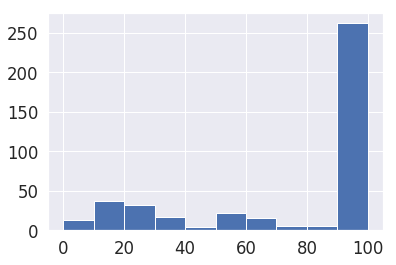

In [0]:
plt.hist(lp)

In [0]:
over_df.columns

Index(['id', 'name', 'hour', 'weekday', 'datetime'], dtype='object')

###ÊâæÂá∫È†ÖÁõÆË≤†Ë≤¨‰∫∫

###ÊâæÂá∫ÂØ¶ÈöõÂÆåÊàêÊôÇÈñì=FinalDateTime

###‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏(DuteDateTime - StartDateTime)

###ÂØ¶ÈöõÂ∑•‰ΩúÂ§©Êï∏(FinalDateTime - StartDateTime)

In [0]:
todo_ids=todo_finished['ID']

account_id_ls=[]#Ë≤†Ë≤¨‰∫∫AccountID(String)
group_id_ls=[]#Áæ§ÁµÑID(String)
role_3_ls=[]#ÂØ©Ê†∏‰∫∫ÂÄãÊï∏(Integer)
role_4_ls=[]#ÂèÉËàá‰∫∫ÂÄãÊï∏(Integer)
role_M_ls=[]#ÁÆ°ÁêÜ‰∫∫ÂÄãÊï∏(Integer)
modify_duedate_times_ls=[]#ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏(Integer)
modify_worker_times_ls=[]#ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏(Integer)
modify_progress_times_ls=[]#Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏(Integer)
last_progress_ls=[]#ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶(Integer)
working_hours_ls=[]#‰º∞Ë®àÂ∑•‰ΩúÊôÇÊï∏(Integer)
actual_working_hours_ls=[]#ÂØ¶ÈöõÂ∑•‰ΩúÊôÇÊï∏(Integer)
working_days_ls=[]#‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏(float)
actual_working_days_ls=[]#ÂØ¶ÈöõÂ∑•‰ΩúÂ§©Êï∏(float)
is_work_over_times_ls=[]#Âä†Áè≠Ê¨°Êï∏(Integer)

diff_day_ls=[]

for tid in todo_ids:
  d=todo_finished[todo_finished.ID==tid]
  group_id=d['GroupID'].iloc[0]
  parane_todo_id=d['ParentToDoID'].iloc[0]
  reply_df_s=reply_df[reply_df.ID==tid]
  
  c_member=member_df[member_df.ID==tid]
  p_member=member_df[member_df.ID==parane_todo_id]
  
  role_1=c_member[c_member.RoleType=='1']
  role_3=c_member[c_member.RoleType=='3']
  role_4=c_member[c_member.RoleType=='4']
  
  worker_account_id=role_1['AccountID'].iloc[0]
  worker_employee_id=role_1['EmployeeCode'].iloc[0]
  
  account_id_ls.append(worker_account_id)
  group_id_ls.append(group_id)
  
  role_1_count=len(role_1)#Ë≤†Ë≤¨‰∫∫
  role_3_count=len(role_3)#ÂØ©Ê†∏‰∫∫
  role_4_count=len(role_4)#ÂèÉËàá‰∫∫
  
  role_M_count=len(p_member[p_member.RoleType=='1'])#ÁÆ°ÁêÜ‰∫∫
  
  role_3_ls.append(int(role_3_count))
  role_4_ls.append(int(role_4_count))
  role_M_ls.append(int(role_M_count))
  
  if(role_3_count>0):
    comments=reply_df_s[reply_df_s['Comment'].str.contains('Â∑≤ÈÄöÈÅéÈ†ÖÁõÆÁöÑÈ©óÊî∂')]
    finish_time=comments['PostedDate'].iloc[len(comments)-1]
    
    final_date_obj = datetime.datetime.strptime(finish_time[:19], '%Y-%m-%dT%H:%M:%S')
    #print('PostedDate: ',finish_time)
  else:
    finish_time=d['ProgressUpdateTime'].iloc[0]
    final_date_obj = datetime.datetime.strptime(finish_time, '%Y-%m-%dT%H:%M:%S.%f')
    #print('ProgressUpdateTime: ',finish_time)
    
  comments=reply_df_s[reply_df_s['Comment'].str.contains('ËÆäÊõ¥‰∫ÜÊà™Ê≠¢ÊôÇÈñì')]
  modify_duedate_times=len(comments)
  modify_duedate_times_ls.append(int(modify_duedate_times))
  #print('ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏:',modify_duedate_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('Â∞áË≤†Ë≤¨‰∫∫Áî±')]
  modify_worker_times=len(comments)
  modify_worker_times_ls.append(int(modify_worker_times))
  #print('ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏:',modify_worker_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('Êõ¥Êñ∞‰∫ÜÈÄ≤Â∫¶')]
  modify_progress_times=len(comments)
  modify_progress_times_ls.append(int(modify_progress_times))
  #print('Êõ¥Êñ∞‰∫ÜÈÄ≤Â∫¶Ê¨°Êï∏:',modify_progress_times)

  last_progress=d['LastProgress'].iloc[0]
  last_progress_ls.append(int(last_progress))

  start_date=d['StartDateTime'].iloc[0]
  due_date=d['DueDateTime'].iloc[0]
  start_date_obj = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M:%S')
  due_date_obj = datetime.datetime.strptime(due_date, '%Y-%m-%dT%H:%M:%S')
  
  
  diff1=due_date_obj-start_date_obj
  diff2=final_date_obj-start_date_obj
  
  #one day = 86400s
  diff1InDays=(diff1.total_seconds() / 86400)#‰º∞Ë®àÂÆåÊàêÂ§©Êï∏
  diff2InDays=(diff2.total_seconds() / 86400)#ÂØ¶ÈöõÂÆåÊàêÂ§©Êï∏
  diff1InHours=(diff1.total_seconds() / 3600)#‰º∞Ë®àÂÆåÊàêÊôÇÊï∏
  diff2InHours=(diff2.total_seconds() / 3600)#ÂØ¶ÈöõÂÆåÊàêÊôÇÊï∏
  
  if(diff2InDays<=0):
    print(d['Title'])
    print(d['StartDateTime'])
    print(d['ProgressUpdateTime'])
    print('final_date_obj: ',final_date_obj)
    print('start_date_obj: ',start_date_obj)

  
  working_hours_ls.append(diff1InHours)
  actual_working_hours_ls.append(diff2InHours)
  working_days_ls.append(diff1InDays)
  actual_working_days_ls.append(diff2InDays)
  
  diff_day_ls.append((diff1InDays-diff2InDays))
  
  #Âä†Áè≠ËàáÂê¶
  worker_attend=over_df[over_df.id==worker_employee_id]
  #print(len(worker_attend))
  is_work_over_times=0
  for i,dateString in enumerate(worker_attend['datetime']):
    a_date=datetime.datetime.strptime(dateString, '%Y-%m-%d %H:%M:%S.%f')
    if(a_date>start_date_obj and final_date_obj>a_date):
      is_work_over_times=is_work_over_times+1
      
  is_work_over_times_ls.append(is_work_over_times)
  #print('is_work_over_times=',is_work_over_times)



(array([  1.,   3.,   0.,   6.,  19., 168., 201.,   9.,   3.,   2.]),
 array([-47.98428241, -40.17259014, -32.36089786, -24.54920559,
        -16.73751332,  -8.92582105,  -1.11412878,   6.6975635 ,
         14.50925577,  22.32094804,  30.13264031]),
 <a list of 10 Patch objects>)

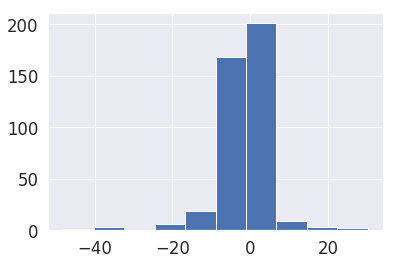

In [0]:
plt.hist(diff_day_ls)

In [0]:
print(np.max(diff_day_ls))
print(np.min(diff_day_ls))

30.132640312499998
-47.984282407407406


(array([128., 106., 109.,  22.,  12.,  13.,   8.,   6.,   0.,   8.]),
 array([-0.425     ,  5.86333218, 12.15166435, 18.43999653, 24.7283287 ,
        31.01666088, 37.30499306, 43.59332523, 49.88165741, 56.16998958,
        62.45832176]),
 <a list of 10 Patch objects>)

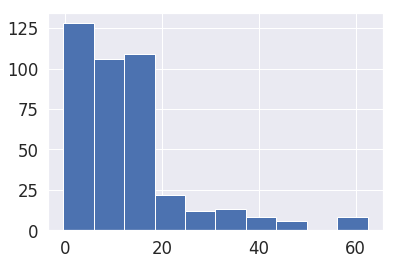

In [0]:
plt.hist(working_days_ls)

(array([144., 144.,  70.,  18.,  18.,   9.,   1.,   4.,   1.,   3.]),
 array([4.64004630e-04, 8.23320117e+00, 1.64659383e+01, 2.46986755e+01,
        3.29314127e+01, 4.11641498e+01, 4.93968870e+01, 5.76296242e+01,
        6.58623613e+01, 7.40950985e+01, 8.23278356e+01]),
 <a list of 10 Patch objects>)

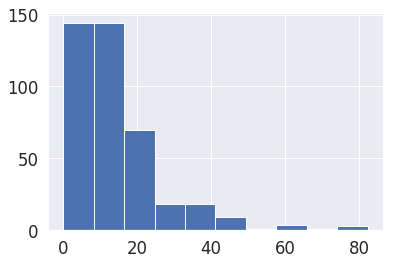

In [0]:
plt.hist(actual_working_days_ls)

###ÊñáÂ≠óË≥áÊñô-Title,‰∏ÄËà¨ÁïôË®Ä,Á≥ªÁµ±ÁïôË®Ä

In [0]:
jieba.load_userdict('/content/todo_prediction/dict.txt')

In [0]:
output = open('text_source.txt', 'w', encoding='utf-8')

In [0]:
title_txt=out_df['Title'].unique()
group_name_txt=out_df['GroupName'].unique()
comment_txt=reply_df['Comment'].unique()

In [0]:
print(len(out_df['GroupName']))
print(len(out_df['GroupName'].unique()))
print(len(out_df['Title']))
print(len(out_df['Title'].unique()))
print(len(reply_df['Comment']))
print(len(reply_df['Comment'].unique()))

742
34
742
686
7526
3229


In [0]:
for tt in title_txt:
  seg_list = jieba.cut(tt, cut_all=False)
  output.write(" ".join(seg_list))
  output.write('\n')
for gn in group_name_txt:
  seg_list = jieba.cut(gn, cut_all=False)
  output.write(" ".join(seg_list))
  output.write('\n')
for ct in comment_txt:
  seg_list = jieba.cut(ct, cut_all=False)
  output.write(" ".join(seg_list))
  output.write('\n')
  
output.close()

In [0]:
sentences = word2vec.LineSentence("text_source.txt")
model = word2vec.Word2Vec(sentences, window=5, min_count=5, size=300, sg=0, workers=32, hs=1, iter=5)
model.save("word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#print (model['ÈÄöÁü•'])
print (model.most_similar("Ëß£Èéñ"))

[('chat', 0.8330261707305908), ('19L005', 0.8258754014968872), ('Âà™', 0.8123999834060669), ('111', 0.8076339960098267), ('Ë≤†Ë≤¨‰∫∫', 0.8013292551040649), ('‰∫∫', 0.7993761301040649), ('Âç≥', 0.791107714176178), ('ÊåáÂÆö', 0.7846459150314331), ('Flow', 0.7821053266525269), ('#', 0.776099443435669)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
todo_finished.columns

Index(['ID', 'Title', 'AccountID', 'Username', 'DisplayName', 'TodoStatus',
       'GroupID', 'GroupName', 'GroupEnabled', 'GroupLevel', 'RootToDoID',
       'ParentToDoID', 'ParentAccountID', 'Progress', 'LastProgress',
       'AlertType', 'ProgressUpdateTime', 'Description', 'HasDueTime',
       'CreatedDateTime', 'LastUpdatedDateTime', 'StartDateTime',
       'DueDateTime'],
      dtype='object')

In [0]:
reply_df.columns

Index(['ID', 'Title', 'PostAccount', 'Username', 'DisplayName', 'CommentID',
       'MessageID', 'ParentID', 'PostType', 'MessageStatus', 'IsReply',
       'RestrictType', 'RestrictAccounts', 'Liking', 'LikeCount', 'PostedDate',
       'Comment'],
      dtype='object')

In [0]:
#Comment
#reply_df['Comment']
rrc=pd.DataFrame({'PostType':reply_df['PostType'],'Comment':reply_df['Comment']})
rrc[reply_df.PostType=='0']

PostType                                            Comment
7           0                                Êï¥È´îÈ©óÂÆåÊàêÔºåÂæÖÈõôÂπ≥Âè∞ÂÆåÊàêÂæåÔºå‰∏ÄËµ∑‰∏äÁ∑öÔºå
9           0                            ÂàóÂÖ•20190313 releaseÔºåÂ∑≤‰∏äÁ∑ö„ÄÇ
11          0     ios FCM ÁßªËΩâÔºå 3/13 ‰∏äÁ∑öÔºåandroid FCM ÁßªËΩâÈ†êË®ÇÊñº 3/18 ‰∏äÁ∑ö„ÄÇ
14          0                           ÂàóÂÖ• 20190318 releaseÔºåÂ∑≤‰∏äÁ∑ö„ÄÇ
16          0                                Ë´ãÊ∫ñÂÇôÊ∏¨Ê©ü‰∫åÂè∞ÔºåÊòéÂ§©Êèê‰æõÁµ¶ÊàëÈÄ≤Ë°åÈ©óË≠â„ÄÇ
282         0                                                 Ok
284         0                                               È©óË≠âÈöéÊÆµ
285         0  #19L001 ÂõûË¶ÜÂäüËÉΩBarÁöÑ+Âª∂‰º∏ÂäüËÉΩÊñ∞Â¢ûË©ïÂàÜÂÖ•Âè£(Â∑≤Êñº1108Áæ§ÁµÑÈ†ÅÈù¢Êõ¥Êñ∞)\nJ\n...
286         0                                          0220Â∑≤‰∏äÁ∑ö‰∫ÜÔºü
287         0                                ÂàóÂÖ• 20190220 release
289         0                                                È©óË≠â‰∏≠
293         0                                        ÈÄôÈ†ÖÁõÆË≤†Ë≤¨‰∫∫ÈÇÑÊ≤íÊåáÊ¥æÔºü
300         0                              ~tu6bf32443~tu9ea4 Êü•È©ó
301         0                ~tu6bf33820~tu9ea4 ÈÄôÊòØÈÄöÁü•‰∏≠ÂøÉÁöÑË™øÊï¥ÔºåË´ãÊõ¥Êñ∞ÈÄ≤Â∫¶„ÄÇ
302         0                          ÂàóÂÖ• 20190225 release, Â∑≤‰∏äÁ∑ö„ÄÇ
309         0                                            ÂØ©Ê†∏‰∏≠‰∏çËÉΩÊõ¥Êñ∞
317         0                                          ÂÖàËôïÁêÜÂåøÂêçÁæ§ÁµÑÂäüËÉΩ
318         0                                          ÂÖàËôïÁêÜÂåøÂêçÁæ§ÁµÑÂäüËÉΩ
319         0                                            Ê∏¨Ë©¶ÂÆåÊàê‰∫ÜÂóéÔºü
320         0                                          Ê∏¨Ë©¶ÂÆåÊàêÔºåÁ≠âÂæÖ‰ªãÊé•
321         0                                          Ê∏¨Ë©¶ÂÆåÊàêÔºåÁ≠âÂæÖ‰ªãÊé•
326         0                                                 ok
348         0           ÁõÆÂâçÈÄ≤Â∫¶OHÂëºÂè´MossÁöÑWebServiceÊúâÂïèÈ°å,Â∞éËá¥Âèñ‰∏çÂà∞Ë≥áÊñô,Â∞öÂú®ËôïÁêÜ‰∏≠
351         0                                 Ë¶ÅÈ®∞Âá∫ÊôÇÈñìÔΩûÂ§öÂ∞ëË¶ÅËôïÁêÜ‰∏Ä‰∫õÔºåË¶ÅÊúâÈÄ≤Â∫¶
354         0              Âõ†Âü∑Ë°åÁ∑äÊÄ•ÂëΩ‰ª§Ë®äÊÅØ/‰∫∫Âì°Ë≥áÊñôÊâãÂãïËΩâÊãã/ÁµÑÁπîËá™ÂãïÂåñÊããËΩâË®éË´ñ,ÊïÖÊú¨ÈÄ±Êö´ÊôÇÁÑ°ÈÄ≤Â∫¶
355         0                                  Ê≠§ÈúÄÂú®Server‰∏äÁõ¥Êé•Debug
357         0                              ÂæÆËªüAndy 6ÊúàÈÄ≤Â†¥,JoyceÊåÅÁ∫åÈÄ≤Ë°å
360         0                            ~tu6bf311~tu9ea4 Ë¶ÅÊèêÂâçÊ∫ñÂÇôÂñî
362         0                ~tu6bf33707~tu9ea4 Ë´ãÊñº2/15ÂÆåÊàê,‰∏¶Êõ¥Êñ∞Â∑•‰ΩúÈÄ≤Â∫¶
366         0                                2019/02/14 Â∑≤ÂÆåÊàê3ÊîØapi
...       ...                                                ...
6896        0                         ÂàóÂÖ• 20190606 releaeÔºå6/6 ‰∏äÁ∑ö„ÄÇ
6897        0                           ÂàóÂÖ• 20190606 releaseÔºåÂ∑≤‰∏äÁ∑ö„ÄÇ
6933        0                                         Â∑≤‰∏äËá≥Ê∏¨Ë©¶ÂçÄÔºåÂæÖÁ¢∫Ë™ç
6939        0                                         6/10Â∑≤‰∏äËá≥PRD
6957        0                        ÂàóÂÖ• 20190530 releaseÔºå6/5 ‰∏äÁ∑ö„ÄÇ
6959        0                                         ÈÄô‰∏çÊòØÂ∑≤Á∂ì‰∏äÁ∑ö‰∫ÜÂóéÔºü
6973        0                                         6/10Â∑≤‰∏äËá≥PRD
6975        0                                         Â∑≤‰∏äËá≥Ê∏¨Ë©¶ÂçÄÔºåÂæÖÁ¢∫Ë™ç
6982        0                 ÈÇÑÊ≤íË¶ÅÈóú\nÂè¶‰∏ÄÈÉ®ÂàÜÊòØÊé•ÊâãÁöÑÁµÑÁπîÔºåÊúÄËøëÊúâÂö¥ÈáçÁöÑÂÖßÊéßÂïèÈ°åÔºåÊâÄ‰ª•ÊâçÊé®Á∑ö‰∏ä
6985        0                          WBKÂÖ¨Âè∏‰∏çÊòØÂ∑≤Á∂ìË¶ÅÈóúÊéâ‰∫Ü\nÁÇ∫‰ΩïÈÇÑÈÇÑË¶ÅÊñ∞Â¢ûÊµÅÁ®ãÔºü
7017        0                                              Ë´ãÊõ¥Êñ∞ÈÄ≤Â∫¶
7023        0                                          bu api‰ªãÊé•‰∏≠
7029        0                                          apiÊé•Âè£‰ªäÂ∑≤Êèê‰æõ
7035        0                                         Êñº6/12Â∑≤Êèê‰æõÊé•Âè£
7043        0                   ÁõÆÂâçÈúÄ3ÊîØapi,È†êË®àÊñº6/12ÂÖàÊèê‰æõÊé•Âè£,ÂæÖ6/18ÂÜçÈÄ≤Ë°åÈñãÁôº
7049        0                                                ÈÄ≤

#Ê®°ÂûãË®ìÁ∑¥

In [0]:
from sklearn import preprocessing

role_3_scaled=preprocessing.minmax_scale(role_3_ls,axis=0,feature_range=(0, 1))
role_4_scaled=preprocessing.minmax_scale(role_4_ls,axis=0,feature_range=(0, 1))
role_M_scaled=preprocessing.minmax_scale(role_M_ls,axis=0,feature_range=(0, 1))
modify_duedate_times_scaled=preprocessing.minmax_scale(modify_duedate_times_ls,axis=0,feature_range=(0, 1))
modify_worker_times_scaled=preprocessing.minmax_scale(modify_worker_times_ls,axis=0,feature_range=(0, 1))
modify_progress_times_scaled=preprocessing.minmax_scale(modify_progress_times_ls,axis=0,feature_range=(0, 1))
last_progress_scaled=preprocessing.minmax_scale(last_progress_ls,axis=0,feature_range=(0, 1))
is_work_over_times_scaled=preprocessing.minmax_scale(is_work_over_times_ls,axis=0,feature_range=(0, 1))
working_days_scaled=preprocessing.minmax_scale(working_days_ls,axis=0,feature_range=(0, 1))

In [0]:
df=pd.DataFrame({
'TODO_ID':todo_ids,
'Ë≤†Ë≤¨‰∫∫':account_id_ls,
'Áæ§ÁµÑID':group_id_ls,
'ÂØ©Ê†∏‰∫∫Êï∏':role_3_scaled,
'ÂèÉËàá‰∫∫Êï∏':role_4_scaled,
'ÁÆ°ÁêÜ‰∫∫Êï∏':role_M_scaled,
'ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏':modify_duedate_times_scaled,
'ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏':modify_worker_times_scaled,
'Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏':modify_progress_times_scaled,
'ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶':last_progress_scaled,
'Âä†Áè≠Ê¨°Êï∏':is_work_over_times_scaled,
'‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏':working_days_scaled,
'ÂØ¶ÈöõÂ∑•‰ΩúÂ§©Êï∏':actual_working_days_ls})

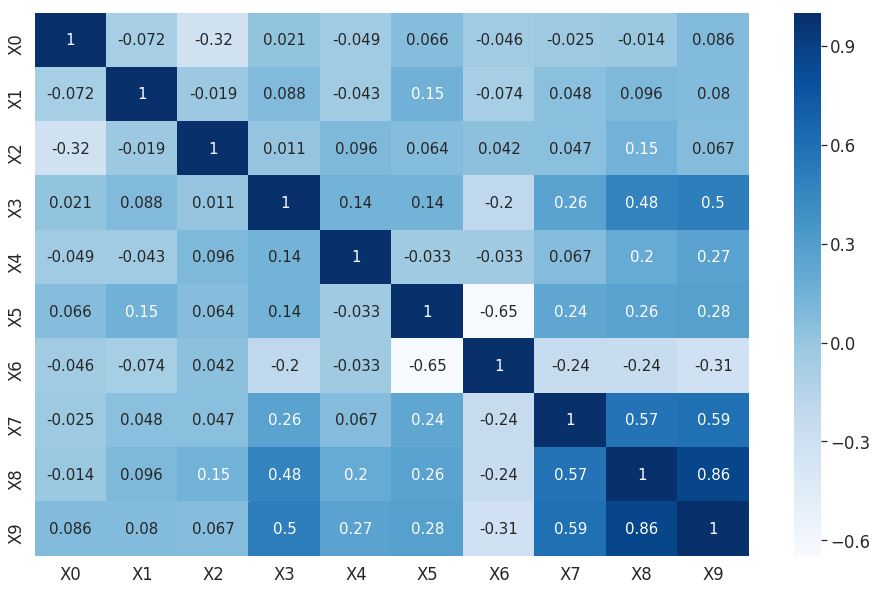

In [0]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
corr=df.corr()
sns.set(font_scale=1.5,font='sans-serif')
sns.heatmap(corr, cmap='Blues', annot=True, annot_kws={"size": 15},
            xticklabels=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9'],
            yticklabels=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9']);

# X0 = 'ÂØ©Ê†∏‰∫∫Êï∏'
# X1 = 'ÂèÉËàá‰∫∫Êï∏'
# X2 = 'ÁÆ°ÁêÜ‰∫∫Êï∏'
# X3 = 'ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏'
# X4 = 'ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏'
# X5 = 'Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏'
# X6 = 'ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶'
# X7 = 'Âä†Áè≠Ê¨°Êï∏'
# X8 = '‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏'
# X9 = 'ÂØ¶ÈöõÂ∑•‰ΩúÂ§©Êï∏'

In [0]:
cols=[
'Ë≤†Ë≤¨‰∫∫',
'Áæ§ÁµÑID',
'ÂØ©Ê†∏‰∫∫Êï∏',
'ÂèÉËàá‰∫∫Êï∏',
'ÁÆ°ÁêÜ‰∫∫Êï∏',
'ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏',
'ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏',
'Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏',
'ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶',
'Âä†Áè≠Ê¨°Êï∏',
'‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏',
]
data=df[cols]
target=df['ÂØ¶ÈöõÂ∑•‰ΩúÂ§©Êï∏']
todo_id=df['TODO_ID']
measure=working_days_ls

In [0]:
print(len(data))
print(len(target))
print(len(todo_id))
print(len(measure))

412
412
412
412


In [0]:
df.head()

TODO_ID   Ë≤†Ë≤¨‰∫∫  Áæ§ÁµÑID  ÂØ©Ê†∏‰∫∫Êï∏  ÂèÉËàá‰∫∫Êï∏  ...  Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏  ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶  Âä†Áè≠Ê¨°Êï∏    ‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏     ÂØ¶ÈöõÂ∑•‰ΩúÂ§©Êï∏
1   12205  3718  1591   0.0   0.0  ...     0.2      0.15   0.0  0.907545  41.088602
2   12206  2457  1591   0.0   0.0  ...     0.1      1.00   0.0  0.907545  41.154646
4   12208  2443  1591   0.0   0.0  ...     0.1      1.00   0.0  0.223330  13.957125
5   12209  2443  1591   0.0   0.0  ...     0.1      1.00   0.0  0.223319  13.969728
6   12210  2443  1591   0.0   0.0  ...     0.1      1.00   0.0  0.334625  26.341257

[5 rows x 13 columns]

In [0]:
df.groupby('Ë≤†Ë≤¨‰∫∫').size()

Ë≤†Ë≤¨‰∫∫
1       10
11       3
1989     9
2193    22
2443    18
2457    44
2702    12
2727     8
2757    16
3014    30
3052    42
3126     1
3162     1
3174    46
3301    57
3539    13
3707     7
3718    59
4409     4
960     10
dtype: int64

In [0]:
print(df['Ë≤†Ë≤¨‰∫∫'].unique())
print(type(df.groupby('Ë≤†Ë≤¨‰∫∫').size()))

['3718' '2457' '2443' '2702' '2757' '3707' '3162' '3014' '960' '3539'
 '3174' '3052' '3301' '2727' '1' '11' '2193' '3126' '1989' '4409']
<class 'pandas.core.series.Series'>


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 1 to 722
Data columns (total 13 columns):
TODO_ID     412 non-null object
Ë≤†Ë≤¨‰∫∫         412 non-null object
Áæ§ÁµÑID        412 non-null object
ÂØ©Ê†∏‰∫∫Êï∏        412 non-null float64
ÂèÉËàá‰∫∫Êï∏        412 non-null float64
ÁÆ°ÁêÜ‰∫∫Êï∏        412 non-null float64
ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏    412 non-null float64
ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏     412 non-null float64
Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏      412 non-null float64
ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶    412 non-null float64
Âä†Áè≠Ê¨°Êï∏        412 non-null float64
‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏      412 non-null float64
ÂØ¶ÈöõÂ∑•‰ΩúÂ§©Êï∏      412 non-null float64
dtypes: float64(10), object(3)
memory usage: 45.1+ KB


In [0]:
data=pd.get_dummies(data)
data.head()

ÂØ©Ê†∏‰∫∫Êï∏  ÂèÉËàá‰∫∫Êï∏  ÁÆ°ÁêÜ‰∫∫Êï∏  ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏  ...  Áæ§ÁµÑID_2554  Áæ§ÁµÑID_948  Áæ§ÁµÑID_949  Áæ§ÁµÑID_999
1   0.0   0.0   1.0  0.000000  ...          0         0         0         0
2   0.0   0.0   1.0  0.333333  ...          0         0         0         0
4   0.0   0.0   0.5  0.000000  ...          0         0         0         0
5   0.0   0.0   0.5  0.000000  ...          0         0         0         0
6   0.0   0.0   0.5  0.000000  ...          0         0         0         0

[5 rows x 40 columns]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, id_train, id_test, ms_train, ms_test  = train_test_split(data, target,todo_id,measure,test_size = 0.2,random_state = 40)

In [0]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(len(id_train))
print(len(id_test))
print(len(ms_train))
print(len(ms_test))

329
83
329
83
329
83
329
83


In [0]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [0]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.001)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#print("RMSE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
print("RMSE : ",sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

RMSE :  5.8791057544326355
R2 Score :  0.8034672361397704


In [0]:
from sklearn import svm
clf = svm.SVR(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("RMSE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

RMSE :  0.8746074561088334
R2 Score :  0.050777106468193556


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=3, random_state=37, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RMSE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

RMSE :  0.5102583556237167
R2 Score :  0.7554419988295326


In [0]:
import xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.06, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print("RMSE : ",sqrt(mean_squared_log_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)
print("R2 Score : ",r2)

[07:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.4348163823395584
R2 Score :  0.7963350753433229


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
idd=todo_df[todo_df.ID.isin(id_test)]
idd

ID  ...          DueDateTime
5    12209  ...  2019-02-14T15:59:59
6    12210  ...  2019-02-21T15:59:59
9    12223  ...  2019-03-29T15:59:59
15   12230  ...  2019-02-15T04:00:00
18   12233  ...  2019-04-03T10:00:00
20   12235  ...  2019-02-22T10:00:00
25   12240  ...  2019-02-21T15:59:59
33   12248  ...  2019-02-20T15:59:59
54   12275  ...  2019-03-29T15:59:59
55   12276  ...  2019-02-27T15:59:59
63   12288  ...  2019-03-14T15:59:59
66   12291  ...  2019-02-22T15:59:59
75   12311  ...  2019-03-21T15:59:24
81   12332  ...  2019-03-22T15:59:59
90   12353  ...  2019-03-20T10:00:00
91   12355  ...  2019-03-11T10:00:00
97   12361  ...  2019-03-20T15:59:59
103  12367  ...  2019-03-20T15:59:59
111  12375  ...  2019-03-20T15:59:59
137  12409  ...  2019-03-28T15:59:59
141  12413  ...  2019-03-28T15:59:59
147  12419  ...  2019-03-28T15:59:59
153  12425  ...  2019-03-28T15:59:59
163  12440  ...  2019-03-20T15:59:59
178  12461  ...  2019-03-28T15:59:59
182  12469  ...  2019-03-30T15:59:59
185  12472  ...  2019-03-30T15:59:59
189  12485  ...  2019-03-22T15:59:59
192  12498  ...  2019-03-22T10:00:00
193  12499  ...  2019-03-25T15:59:59
..     ...  ...                  ...
391  12969  ...  2019-04-25T15:59:59
394  12973  ...  2019-05-06T15:59:59
408  12990  ...  2019-05-03T15:59:59
427  13013  ...  2019-04-26T15:59:59
429  13015  ...  2019-04-30T15:59:59
441  13027  ...  2019-04-30T15:59:59
454  13048  ...  2019-05-03T15:59:59
460  13054  ...  2019-05-03T15:59:59
473  13067  ...  2019-05-10T15:59:59
476  13071  ...  2019-05-14T15:59:59
487  13082  ...  2019-05-14T15:59:59
490  13085  ...  2019-05-14T15:59:59
491  13086  ...  2019-05-14T15:59:59
493  13090  ...  2019-05-14T15:59:59
525  13139  ...  2019-05-17T15:59:59
533  13154  ...  2019-05-24T15:59:59
551  13176  ...  2019-05-16T15:59:59
582  13270  ...  2019-05-20T15:59:59
589  13278  ...  2019-05-23T15:59:59
593  13282  ...  2019-05-23T15:59:59
595  13284  ...  2019-05-23T15:59:59
598  13287  ...  2019-05-23T15:59:59
599  13288  ...  2019-05-23T15:59:59
604  13293  ...  2019-05-30T15:59:59
609  13298  ...  2019-05-23T15:59:59
630  13320  ...  2019-05-23T15:59:59
638  13341  ...  2019-05-31T16:00:59
654  13374  ...  2019-06-04T15:59:59
656  13378  ...  2019-06-12T10:00:59
657  13379  ...  2019-06-05T15:59:59

[83 rows x 23 columns]

#Ê®°ÂûãÈ©óË≠â

In [0]:
count=0
for i,wd in enumerate(y_test):
  m=(y_pred[i]-wd)/wd
  if(abs(m)<=0.2):
    count=count+1
    print('ÂØ¶Èöõ=',wd,' È†êÊ∏¨=',y_pred[i])

print('Total:=',len(y_test))
print('Ë™§Â∑ÆÂ∞èÊñº20%Â§©Êï∏= ',count)

ÂØ¶Èöõ= 12.087928240740741  È†êÊ∏¨= 14.093607
ÂØ¶Èöõ= 4.003067129629629  È†êÊ∏¨= 3.3273585
ÂØ¶Èöõ= 9.225462962962963  È†êÊ∏¨= 9.652822
ÂØ¶Èöõ= 21.053506944444443  È†êÊ∏¨= 21.55633
ÂØ¶Èöõ= 37.031527777777775  È†êÊ∏¨= 33.383118
ÂØ¶Èöõ= 13.030208333333333  È†êÊ∏¨= 13.126435
ÂØ¶Èöõ= 13.969728090277778  È†êÊ∏¨= 11.774258
ÂØ¶Èöõ= 9.869375  È†êÊ∏¨= 11.4699745
ÂØ¶Èöõ= 16.86076388888889  È†êÊ∏¨= 17.16777
ÂØ¶Èöõ= 13.469814814814814  È†êÊ∏¨= 12.967409
ÂØ¶Èöõ= 82.32783564814815  È†êÊ∏¨= 79.137115
ÂØ¶Èöõ= 15.07045138888889  È†êÊ∏¨= 16.041473
ÂØ¶Èöõ= 10.221863425925926  È†êÊ∏¨= 10.936102
ÂØ¶Èöõ= 14.844212962962963  È†êÊ∏¨= 16.247334
ÂØ¶Èöõ= 29.391597222222224  È†êÊ∏¨= 24.113695
ÂØ¶Èöõ= 7.00559880787037  È†êÊ∏¨= 7.0743017
ÂØ¶Èöõ= 24.43223480324074  È†êÊ∏¨= 28.911793
ÂØ¶Èöõ= 38.30952546296297  È†êÊ∏¨= 41.781017
ÂØ¶Èöõ= 13.465266203703704  È†êÊ∏¨= 13.266131
ÂØ¶Èöõ= 14.082604166666666  È†êÊ∏¨= 14.523558
ÂØ¶Èöõ= 29.019444444444446  È†êÊ∏¨= 33.506466
ÂØ¶Èöõ= 31.049351851851853  È†êÊ∏¨= 32.71007
ÂØ¶Èöõ= 8.

In [0]:
count=0
id_ls=[]
for i,wd in enumerate(y_test):
  m=(y_pred[i]-wd)/wd
  if(abs(m)>=0.5):
    count=count+1
    id_ls.append(id_test.iloc[i])
    print('ÂØ¶Èöõ=',wd,' È†êÊ∏¨=',y_pred[i], '  TODO_ID=', id_test.iloc[i])

print('Ë™§Â∑ÆÂ§ßÊñº50%Â§©Êï∏= ',count)

ÂØ¶Èöõ= 6.126719872685185  È†êÊ∏¨= 11.655335   TODO_ID= 12248
ÂØ¶Èöõ= 1.1299421296296297  È†êÊ∏¨= 3.48491   TODO_ID= 13048
ÂØ¶Èöõ= 24.789357025462966  È†êÊ∏¨= 10.189891   TODO_ID= 12332
ÂØ¶Èöõ= 3.651273148148148  È†êÊ∏¨= 6.641911   TODO_ID= 13067
ÂØ¶Èöõ= 5.551793981481482  È†êÊ∏¨= 8.347822   TODO_ID= 12792
ÂØ¶Èöõ= 5.523055555555556  È†êÊ∏¨= 8.518173   TODO_ID= 13378
ÂØ¶Èöõ= 11.075150462962963  È†êÊ∏¨= 3.6540287   TODO_ID= 12355
ÂØ¶Èöõ= 5.9086689814814815  È†êÊ∏¨= 9.408441   TODO_ID= 13027
ÂØ¶Èöõ= 0.473580787037037  È†êÊ∏¨= 7.0481586   TODO_ID= 13154
ÂØ¶Èöõ= 6.184039351851852  È†êÊ∏¨= 15.646463   TODO_ID= 12969
ÂØ¶Èöõ= 5.551967592592592  È†êÊ∏¨= 8.347822   TODO_ID= 12793
ÂØ¶Èöõ= 7.351720914351852  È†êÊ∏¨= 11.510753   TODO_ID= 13090
ÂØ¶Èöõ= 41.02162758101852  È†êÊ∏¨= 6.706754   TODO_ID= 12485
ÂØ¶Èöõ= 8.098357835648148  È†êÊ∏¨= 2.6605446   TODO_ID= 13139
ÂØ¶Èöõ= 1.2237384259259259  È†êÊ∏¨= 2.0798614   TODO_ID= 12921
ÂØ¶Èöõ= 10.502777777777778  È†êÊ∏¨= 16.129288   TODO_ID= 13379
ÂØ¶Èöõ= 1.

In [0]:
todo_df[todo_df.ID.isin(id_ls)]

ID                 Title  ...        StartDateTime          DueDateTime
20   12235            TFSÁöÑÊ∏¨Ë©¶Áí∞Â¢ÉÂª∫ÁΩÆ  ...  2019-02-14T15:34:00  2019-02-22T10:00:00
33   12248           ios #19U005  ...  2019-02-15T00:51:00  2019-02-20T15:59:59
66   12291                 Ë©ïÂàÜÈÄ≤‰∏≤ÊµÅ  ...  2019-02-21T10:46:00  2019-02-22T15:59:59
81   12332             ‰ºÅÊ•≠ÁµÑÁπî-Á∑äÊÄ•Ë®äÊÅØ  ...  2019-03-04T12:28:00  2019-03-22T15:59:59
91   12355  #4249 Ë™øÊï¥GamaFlowÁï∞Â∏∏È°ØÁ§∫  ...  2019-03-07T03:22:00  2019-03-11T10:00:00
189  12485                ÂêçÁâá‰∫§ÊèõÂú∞Èªû  ...  2019-03-19T01:55:00  2019-03-22T15:59:59
192  12498        #4274 2019È†êÁÆóÁ∑®Âàó  ...  2019-03-19T14:52:00  2019-03-22T10:00:00
287  12792               #19S093  ...  2019-04-04T01:55:00  2019-04-09T15:59:59
288  12793               #19S094  ...  2019-04-04T01:55:00  2019-04-09T15:59:59
366  12920  #19M004 IMKit SDK Êõ¥Êñ∞  ...  2019-04-17T01:29:00  2019-04-17T15:59:59
367  12921    #19H097 ÈÄöÁü•‰∏≠ÂøÉÂ∑≤ËÆÄÈ°èËâ≤ËÆäÊõ¥  ...  2019-04-17T01:35:00  2019-04-17T15:59:59
391  12969                ÂÄã‰∫∫Ë≥áË®äÊñ∞Â¢û  ...  2019-04-19T09:52:00  2019-04-25T15:59:59
427  13013            ÂêçÁâá‰∫§ÊèõÂú∞ÈªûÈÅ∫ÊºèË£ú‰∏ä  ...  2019-04-26T11:07:00  2019-04-26T15:59:59
441  13027     #19R017ÂÅ¥ÈÇäÊ¨Ñ-Á∑äÊÄ•Ë®äÊÅØÁµ±Ë®à  ...  2019-04-27T11:06:00  2019-04-30T15:59:59
454  13048   #19S120Â†±ÂëäÊâπÈñ±ÂÆåÊõ¥Êñ∞ÔºåÂéªÈô§Á¥ÖÈªû  ...  2019-05-03T00:00:00  2019-05-03T15:59:59
473  13067                  Á∑ö‰∏äËçâÁ®ø  ...  2019-05-06T00:00:00  2019-05-10T15:59:59
493  13090       ÊñáÊ°àË™øÊï¥ÔºàÁõÆÊ®ô„ÄÅÈ†ÖÁõÆ„ÄÅÈÅîÊàêÁéáÔºâ  ...  2019-05-09T00:00:00  2019-05-14T15:59:59
525  13139         ÈÇÑÂéüÂèäÂÇô‰ªΩÈáëÈë∞ÊµÅÁ®ãË¶èÂäÉv2  ...  2019-05-15T00:00:00  2019-05-17T15:59:59
533  13154              Â∏≥ËôüÊ†ºÂºèË¶èÂâáË™øÊï¥  ...  2019-05-15T00:00:00  2019-05-24T15:59:59
656  13378  #4411ApprovalÊú™ÂëàÁèæÁ∞ΩÊ†∏Ë≥áË®ä  ...  2019-06-04T16:00:00  2019-06-12T10:00:59
657  13379       #19R020 Âª∂ÈÅ≤ÁôºÈÄÅÂÖ®ÂäüËÉΩ  ...  2019-05-27T16:00:00  2019-06-05T15:59:59

[21 rows x 23 columns]

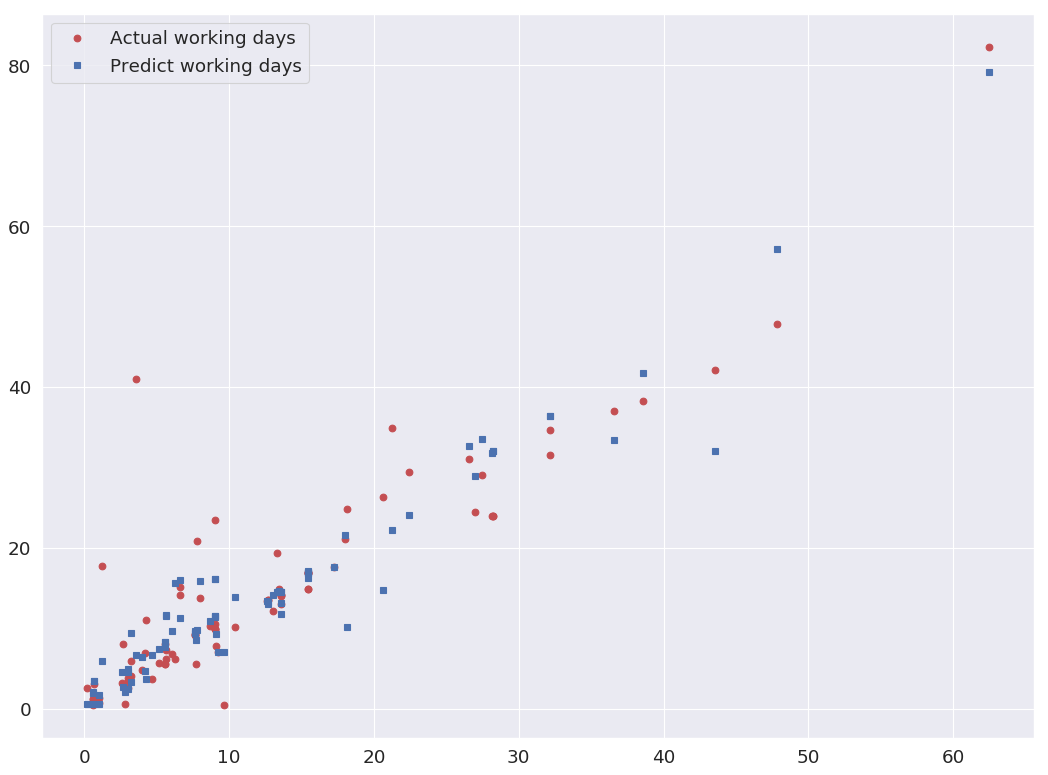

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(ms_test,y_test,'ro',label='Actual working days')
plt.plot(ms_test,y_pred,'bs',label='Predict working days')
plt.legend()

In [0]:
idd.groupby('GroupName').size()

GroupName
APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä        74
CTO teamup!       1
UI/UX(ÁõÆÊ®ôÈ†ÖÁõÆÁÆ°ÁêÜÔºâ     3
ÂåÖÁßüÂÖ¨               1
ÈõÜÂúòÁ∂ìÁáüÊúÉË≠∞            4
dtype: int64

In [0]:
pred=pd.DataFrame({'TODO_ID':id_test,'y_test':y_test,'y_pred':y_pred,'ID':idd['ID'],'GroupName':idd['GroupName'],'TodoTitle':idd['Title']})
pred

TODO_ID     y_test  ...      GroupName                       TodoTitle
5     12209  13.969728  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä            Android Ë≤ºÊñáÂõûË¶ÜÂª∂Áî≥ bar U
6     12210  26.341257  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                        iOS ÈÄöÁü•Ëø∑Ëà™
9     12223  42.126440  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                            ÊêúÁ¥¢Â∑•‰Ωú
15    12230   0.395984  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                  #4198 Ë™øÊï¥Âá∫Â∑ÆÁî≥Ë´ãÊµÅÁ®ã
18    12233  47.831910  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                      GamaFlowËΩâÁßª
20    12235  20.891412  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                      TFSÁöÑÊ∏¨Ë©¶Áí∞Â¢ÉÂª∫ÁΩÆ
25    12240  14.158766  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                 Android #19L006
33    12248   6.126720  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                     ios #19U005
54    12275  37.031528  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19L015
55    12276  15.070451  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19L013
63    12288  34.914248  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                          ÁµÑÁπîÂëΩ‰ª§Ë®äÊÅØ
66    12291  17.681921  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                           Ë©ïÂàÜÈÄ≤‰∏≤ÊµÅ
75    12311  29.391597  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                  ÁáüÈÅãÂæåÂè∞Ê¨äÈôêË™øÊï¥ÁÇ∫ÈõÜÂúòÂºèÊéßÁÆ°
81    12332  24.789357  ...         ÈõÜÂúòÁ∂ìÁáüÊúÉË≠∞                       ‰ºÅÊ•≠ÁµÑÁπî-Á∑äÊÄ•Ë®äÊÅØ
90    12353  19.369248  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä            #4239 Ë™øÊï¥GHQ/GTWÁ∞ΩÂëàÊ†∏Ê±∫Ê¨ä
91    12355  11.075150  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä            #4249 Ë™øÊï¥GamaFlowÁï∞Â∏∏È°ØÁ§∫
97    12361  13.469815  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19L018
103   12367  13.465266  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19L025
111   12375  13.438241  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19U018
137   12409  16.860764  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19U036
141   12413  16.858889  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19U040
147   12419  17.057569  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19L034
153   12425  16.874109  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19L040
163   12440   6.771204  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä               #19S072 web ÁâàÁôªÂÖ•ÂÑ™Âåñ
178   12461  14.844236  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19U047
182   12469  14.845891  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19U055
185   12472  14.844213  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                         #19U058
189   12485  41.021628  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                          ÂêçÁâá‰∫§ÊèõÂú∞Èªû
192   12498   0.602211  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                  #4274 2019È†êÁÆóÁ∑®Âàó
193   12499   5.682951  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä         ÔºªBUApiÔºΩÁ∑äÊÄ•Ë®äÊÅØÁµ±Ë®àÊîπÂèñÁôºÈÄÅÁï∂‰∏ãÁµÑÁπîË®òÈåÑ
..      ...        ...  ...            ...                             ...
391   12969   6.184039  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                          ÂÄã‰∫∫Ë≥áË®äÊñ∞Â¢û
394   12973  17.678657  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                            ‰ºÅÊ•≠ÂãïÊÖã
408   12990   7.005599  ...         ÈõÜÂúòÁ∂ìÁáüÊúÉË≠∞                Êñ∞Â¢ûÂ∑•‰ΩúÁöÑ‰∏≠Ê≠¢ËàáÈáçÂïüÁöÑÁãÄÊÖãËàáÊµÅÁ®ã
427   13013   2.603853  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                      ÂêçÁâá‰∫§ÊèõÂú∞ÈªûÈÅ∫ÊºèË£ú‰∏ä
429   13015   6.899254  ...         ÈõÜÂúòÁ∂ìÁáüÊúÉË≠∞                        New CIÁΩÆÊèõ
441   13027   5.908669  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä               #19R017ÂÅ¥ÈÇäÊ¨Ñ-Á∑äÊÄ•Ë®äÊÅØÁµ±Ë®à
454   13048   1.129942  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä             #19S120Â†±ÂëäÊâπÈñ±ÂÆåÊõ¥Êñ∞ÔºåÂéªÈô§Á¥ÖÈªû
460   13054   3.083241  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä          #19H107 Áæ§ÁµÑÂÖßÈ†ÅÔºåÂª∂ÈÅ≤Áôº‰ΩàË®≠ÂÆöÂø´Êç∑Èçµ
473   13067   3.651273  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä                            Á∑ö‰∏äËçâÁ®ø
476   13071  10.221863  ...      APDÊØèÈÄ±‰æãÊúÉÂ†±Âëä       #19H112 ÂÖ®Èù¢ÊÄßÊñáÂ≠óË™ø

In [0]:
print(type(datetime.datetime.now))
print(datetime.datetime.today())

<class 'builtin_function_or_method'>
2019-07-11 07:20:04.422664


#Ê∏¨Ë©¶

In [0]:
apd_todo_ids=apd_todo_unfinish['ID']

account_id_ls=[]#Ë≤†Ë≤¨‰∫∫AccountID(String)
group_id_ls=[]#Áæ§ÁµÑID(String)
role_3_ls=[]#ÂØ©Ê†∏‰∫∫ÂÄãÊï∏(Integer)
role_4_ls=[]#ÂèÉËàá‰∫∫ÂÄãÊï∏(Integer)
role_M_ls=[]#ÁÆ°ÁêÜ‰∫∫ÂÄãÊï∏(Integer)
modify_duedate_times_ls=[]#ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏(Integer)
modify_worker_times_ls=[]#ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏(Integer)
modify_progress_times_ls=[]#Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏(Integer)
last_progress_ls=[]#ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶(Integer)
working_hours_ls=[]#‰º∞Ë®àÂ∑•‰ΩúÊôÇÊï∏(Integer)
working_days_ls=[]#‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏(float)
is_work_over_times_ls=[]#Âä†Áè≠Ê¨°Êï∏(Integer)

diff_day_ls=[]

for tid in apd_todo_ids:
  d=apd_todo_unfinish[apd_todo_unfinish.ID==tid]
  group_id=d['GroupID'].iloc[0]
  parane_todo_id=d['ParentToDoID'].iloc[0]
  reply_df_s=reply_df[reply_df.ID==tid]
  
  c_member=member_df[member_df.ID==tid]
  p_member=member_df[member_df.ID==parane_todo_id]
  
  role_1=c_member[c_member.RoleType=='1']
  role_3=c_member[c_member.RoleType=='3']
  role_4=c_member[c_member.RoleType=='4']
  
  worker_account_id=role_1['AccountID'].iloc[0]
  worker_employee_id=role_1['EmployeeCode'].iloc[0]
  
  account_id_ls.append(worker_account_id)
  group_id_ls.append(group_id)
  
  role_1_count=len(role_1)#Ë≤†Ë≤¨‰∫∫
  role_3_count=len(role_3)#ÂØ©Ê†∏‰∫∫
  role_4_count=len(role_4)#ÂèÉËàá‰∫∫
  
  role_M_count=len(p_member[p_member.RoleType=='1'])#ÁÆ°ÁêÜ‰∫∫
  
  role_3_ls.append(int(role_3_count))
  role_4_ls.append(int(role_4_count))
  role_M_ls.append(int(role_M_count))

  comments=reply_df_s[reply_df_s['Comment'].str.contains('ËÆäÊõ¥‰∫ÜÊà™Ê≠¢ÊôÇÈñì')]
  modify_duedate_times=len(comments)
  modify_duedate_times_ls.append(int(modify_duedate_times))
  #print('ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏:',modify_duedate_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('Â∞áË≤†Ë≤¨‰∫∫Áî±')]
  modify_worker_times=len(comments)
  modify_worker_times_ls.append(int(modify_worker_times))
  #print('ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏:',modify_worker_times)

  comments=reply_df_s[reply_df_s['Comment'].str.contains('Êõ¥Êñ∞‰∫ÜÈÄ≤Â∫¶')]
  modify_progress_times=len(comments)
  modify_progress_times_ls.append(int(modify_progress_times))
  #print('Êõ¥Êñ∞‰∫ÜÈÄ≤Â∫¶Ê¨°Êï∏:',modify_progress_times)

  last_progress=d['LastProgress'].iloc[0]
  last_progress_ls.append(int(last_progress))

  start_date=d['StartDateTime'].iloc[0]
  due_date=d['DueDateTime'].iloc[0]
  start_date_obj = datetime.datetime.strptime(start_date, '%Y-%m-%dT%H:%M:%S')
  due_date_obj = datetime.datetime.strptime(due_date, '%Y-%m-%dT%H:%M:%S')
  
  final_date_obj=datetime.datetime.today()
  
  diff1=due_date_obj-start_date_obj
  diff2=final_date_obj-start_date_obj
  
  #one day = 86400s
  diff1InDays=(diff1.total_seconds() / 86400)#‰º∞Ë®àÂÆåÊàêÂ§©Êï∏
  diff2InDays=(diff2.total_seconds() / 86400)#ÂØ¶ÈöõÂÆåÊàêÂ§©Êï∏
  diff1InHours=(diff1.total_seconds() / 3600)#‰º∞Ë®àÂÆåÊàêÊôÇÊï∏
  diff2InHours=(diff2.total_seconds() / 3600)#ÂØ¶ÈöõÂÆåÊàêÊôÇÊï∏
  
  if(diff2InDays<=0):
    print(d['Title'])
    print(d['StartDateTime'])
    print(d['ProgressUpdateTime'])
    print('final_date_obj: ',final_date_obj)
    print('start_date_obj: ',start_date_obj)

  
  working_hours_ls.append(diff1InHours)
  working_days_ls.append(diff1InDays)
  
  #Âä†Áè≠Ê¨°Êï∏
  worker_attend=over_df[over_df.id==worker_employee_id]
  #print(len(worker_attend))
  is_work_over_times=0
  for i,dateString in enumerate(worker_attend['datetime']):
    a_date=datetime.datetime.strptime(dateString, '%Y-%m-%d %H:%M:%S.%f')
    if(a_date>start_date_obj and final_date_obj>a_date):
      is_work_over_times=is_work_over_times+1
      
  is_work_over_times_ls.append(is_work_over_times)


704    phase III - UI
Name: Title, dtype: object
704    2019-07-14T16:00:00
Name: StartDateTime, dtype: object
704    None
Name: ProgressUpdateTime, dtype: object
final_date_obj:  2019-07-11 07:20:05.131272
start_date_obj:  2019-07-14 16:00:00
705    Phase II - ÂæåÁ´Ø
Name: Title, dtype: object
705    2019-07-28T16:00:00
Name: StartDateTime, dtype: object
705    None
Name: ProgressUpdateTime, dtype: object
final_date_obj:  2019-07-11 07:20:05.148081
start_date_obj:  2019-07-28 16:00:00
706    Phase III - ÂæåÁ´Ø
Name: Title, dtype: object
706    2019-08-11T16:00:00
Name: StartDateTime, dtype: object
706    None
Name: ProgressUpdateTime, dtype: object
final_date_obj:  2019-07-11 07:20:05.162244
start_date_obj:  2019-08-11 16:00:00


In [0]:
role_3_scaled=preprocessing.minmax_scale(role_3_ls,axis=0,feature_range=(0, 1))
role_4_scaled=preprocessing.minmax_scale(role_4_ls,axis=0,feature_range=(0, 1))
role_M_scaled=preprocessing.minmax_scale(role_M_ls,axis=0,feature_range=(0, 1))
modify_duedate_times_scaled=preprocessing.minmax_scale(modify_duedate_times_ls,axis=0,feature_range=(0, 1))
modify_worker_times_scaled=preprocessing.minmax_scale(modify_worker_times_ls,axis=0,feature_range=(0, 1))
modify_progress_times_scaled=preprocessing.minmax_scale(modify_progress_times_ls,axis=0,feature_range=(0, 1))
last_progress_scaled=preprocessing.minmax_scale(last_progress_ls,axis=0,feature_range=(0, 1))
is_work_over_times_scaled=preprocessing.minmax_scale(is_work_over_times_ls,axis=0,feature_range=(0, 1))
working_days_scaled=preprocessing.minmax_scale(working_days_ls,axis=0,feature_range=(0, 1))

df=pd.DataFrame({
'TODO_ID':apd_todo_ids,
'Ë≤†Ë≤¨‰∫∫':account_id_ls,
'Áæ§ÁµÑID':group_id_ls,
'ÂØ©Ê†∏‰∫∫Êï∏':role_3_scaled,
'ÂèÉËàá‰∫∫Êï∏':role_4_scaled,
'ÁÆ°ÁêÜ‰∫∫Êï∏':role_M_scaled,
'ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏':modify_duedate_times_scaled,
'ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏':modify_worker_times_scaled,
'Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏':modify_progress_times_scaled,
'ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶':last_progress_scaled,
'Âä†Áè≠Ê¨°Êï∏':is_work_over_times_scaled,
'‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏':working_days_scaled})

cols=[
'Ë≤†Ë≤¨‰∫∫',
'Áæ§ÁµÑID',
'ÂØ©Ê†∏‰∫∫Êï∏',
'ÂèÉËàá‰∫∫Êï∏',
'ÁÆ°ÁêÜ‰∫∫Êï∏',
'ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏',
'ËÆäÊõ¥Ë≤†Ë≤¨‰∫∫Ê¨°Êï∏',
'Êõ¥Êñ∞ÈÄ≤Â∫¶Ê¨°Êï∏',
'ÊúÄÂæå‰∏ÄÊ¨°Êõ¥Êñ∞ÈÄ≤Â∫¶',
'Âä†Áè≠Ê¨°Êï∏',
'‰º∞Ë®àÂ∑•‰ΩúÂ§©Êï∏',
]
data=df[cols]
todo_id=df['TODO_ID']
#measure=working_days_ls

In [0]:
data=pd.get_dummies(data)
data.head()

ÂØ©Ê†∏‰∫∫Êï∏  ÂèÉËàá‰∫∫Êï∏      ÁÆ°ÁêÜ‰∫∫Êï∏  ËÆäÊõ¥Êà™Ê≠¢ÊôÇÈñìÊ¨°Êï∏  ...  Ë≤†Ë≤¨‰∫∫_3718  Ë≤†Ë≤¨‰∫∫_4409  Ë≤†Ë≤¨‰∫∫_960  Áæ§ÁµÑID_1591
11    1.0   0.0  0.333333      0.50  ...         0         0        0          1
124   1.0   0.0  0.000000      0.25  ...         0         0        0          1
196   1.0   0.0  0.333333      0.25  ...         0         0        0          1
197   1.0   0.0  0.333333      0.00  ...         0         0        1          1
198   1.0   0.0  0.333333      0.00  ...         0         0        1          1

[5 rows x 28 columns]

In [0]:
#RandamForest
y_pred = rf.predict(data)
predic_df=pd.DataFrame({'TODO_ID':todo_id,'Working days prediction':y_pred})
predic_df.head(10)